# Ëá™ÂàÜ„ÅßÊ∑±Â±§Â≠¶Áøí„ÇíÂÆüË£Ö„Åó„Å¶„Åø„ÇãÔºÅÔºÅ

# 3Ê°Å„ÅÆÔºíÈÄ≤Êï∞„Çí„ÄÅÔºëÔºêÈÄ≤Êï∞„Å´Â§âÊèõ„Åô„Çã„Éç„ÉÉ„Éà

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # ÊúÄÂ§ßÂÄ§„ÇíÂèñÂæó
    max_value = np.max(lst)

    # ÊúÄÂ§ßÂÄ§„Å†„Åë1„ÄÅÊÆã„Çä„Çí0„ÅÆÈÖçÂàó„Å´ÁΩÆ„ÅçÊèõ„Åà„Çã
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(sum_squared_error, y, teach, w):#„Åì„Åì„ÅÆÔΩô„ÅØ„ÄÅÈ†Ü‰ºùÊí≠„Åó„ÅüÁµêÊûú„ÅÆ„Åì„Å®„Å™„ÅÆ„Åß„ÄÅÂÖ•ÂäõÂÄ§x„ÅÆÊÉÖÂ†±„ÅØÂÖ•„Å£„Å¶„ÅÑ„Çã„ÄÇ
    h = 1e-4#0.0001
    loss = sum_squared_error(y, teach)

    return (sum_squared_error(w+h)-sum_squared_error(w-h))/(2*h)

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3Â±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÂÆöÁæ©
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #„Åì„Çå„Çâ„ÅØinit„Å´Êõ∏„Åè„Åπ„Åç„Å™„Åç„Åå„Åô„Çã
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y


dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #„Åã„Çì„Åô„ÅÜ„Çí„ÅÑ„Çå„Å™„Åç„ÇÉ„Å†„ÇÅ

for i in range(10):
    x, teach = make_input()
    y = forward(network, x)

    for num in range(len(network['W1'])):#„Éé„Éº„Éâ„ÅÆÂÄãÊï∞
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, x, y, teach, network['W1'][num][i])#Èñ¢Êï∞„ÇíÂºïÊï∞„Å´ÂÖ•„Çå„ÇãÂ†¥Âêà„ÅØ„ÄÅÈñ¢Êï∞Âêç„ÇíÂºïÊï∞„Å´ÂÖ•„Çå„Çã„ÄÇÊ∏°„Åó„ÅüÊùêÊñô„Åß„ÄÅÈñ¢Êï∞„ÅÆ‰∏≠„Åß„ÄÅÂÖ•„Çå„ÅüÈñ¢Êï∞„Å´ÂºïÊï∞„ÇíÊ∏°„Åó„Å¶‰ΩøÁî®„Åô„Çã„ÄÇ

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # ÂæÆÂàÜ„Åó„Å¶Ê±Ç„ÇÅ„Åü„Åù„Çå„Åû„Çå„ÅÆÂÇæ„Åç„Çí„ÇÇ„Å®„Å´„ÄÅÈáç„Åø„ÇíÊõ¥Êñ∞
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



In [ ]:
import numpy as np

def change_one_hot(lst):
    # ÊúÄÂ§ßÂÄ§„ÇíÂèñÂæó
    max_value = np.max(lst)

    # ÊúÄÂ§ßÂÄ§„Å†„Åë1„ÄÅÊÆã„Çä„Çí0„ÅÆÈÖçÂàó„Å´ÁΩÆ„ÅçÊèõ„Åà„Çã
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result


# „Åî„Å£„Å°„ÇÉ„Å´„Å™„Å£„Å¶„Åó„Åæ„Å£„Åü„ÅÆ„Åß„ÄÅ‰Ωú„ÇäÁõ¥„Åó 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # ÊúÄÂ§ßÂÄ§„ÇíÂèñÂæó
    max_value = np.max(lst)

    # ÊúÄÂ§ßÂÄ§„Å†„Åë1„ÄÅÊÆã„Çä„Çí0„ÅÆÈÖçÂàó„Å´ÁΩÆ„ÅçÊèõ„Åà„Çã
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)


def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3Â±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÂÆöÁæ©
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #„Åì„Çå„Çâ„ÅØinit„Å´Êõ∏„Åè„Åπ„Åç„Å™„Åç„Åå„Åô„Çã
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y

def bibun_numerical_gradient(sum_squared_error ,ywh1, ywh2):#„Åì„Åì„ÅÆÔΩô„ÅØ„ÄÅÈ†Ü‰ºùÊí≠„Åó„ÅüÁµêÊûú„ÅÆ„Åì„Å®„Å™„ÅÆ„Åß„ÄÅÂÖ•ÂäõÂÄ§x„ÅÆÊÉÖÂ†±„ÅØÂÖ•„Å£„Å¶„ÅÑ„Çã„ÄÇ
    h = 1e-4#0.0001

    return (sum_squared_error(ywh1)-sum_squared_error(ywh2))/(2*h)




dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #„Åã„Çì„Åô„ÅÜ„Çí„ÅÑ„Çå„Å™„Åç„ÇÉ„Å†„ÇÅ

for i in range(10):
    x, teach = make_input()
    y1 = forward(network, x)
    y2 = forward(network, x)

    for num in range(len(network['W1'])):#„Éé„Éº„Éâ„ÅÆÂÄãÊï∞
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, , network['W1'][num][i])#Èñ¢Êï∞„ÇíÂºïÊï∞„Å´ÂÖ•„Çå„ÇãÂ†¥Âêà„ÅØ„ÄÅÈñ¢Êï∞Âêç„ÇíÂºïÊï∞„Å´ÂÖ•„Çå„Çã„ÄÇÊ∏°„Åó„ÅüÊùêÊñô„Åß„ÄÅÈñ¢Êï∞„ÅÆ‰∏≠„Åß„ÄÅÂÖ•„Çå„ÅüÈñ¢Êï∞„Å´ÂºïÊï∞„ÇíÊ∏°„Åó„Å¶‰ΩøÁî®„Åô„Çã„ÄÇ

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # ÂæÆÂàÜ„Åó„Å¶Ê±Ç„ÇÅ„Åü„Åù„Çå„Åû„Çå„ÅÆÂÇæ„Åç„Çí„ÇÇ„Å®„Å´„ÄÅÈáç„Åø„ÇíÊõ¥Êñ∞
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



In [ ]:
import numpy as np
import pprint
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3]
    return network




w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô


w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
    
b2 = np.array([[0.1, 0.2, 0.5, 0.3, 0.4]])#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
w3 = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
b3 = np.array([[0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô

network = set_network(w1,b1,w2,b2,w3,b3)
pprint.pprint(network)
print("-------------------------------------------")
network[1][0][0] += 0.001
pprint.pprint(network)
print(len(network))

network1_zeros = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]

print(network1_zeros)



# ‚Üì„Åô„ÅêÂãï„Åã„Åõ„Åæ„Åô‚Üì

C:\Users\atusi\AppData\Local\Temp\ipykernel_50548\3470600840.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´


[[0.15416284 0.7400497  0.26331502 0.53373939]
 [0.01457496 0.91874701 0.90071485 0.03342143]
 [0.95694934 0.13720932 0.28382835 0.60608318]]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30000/30000 [02:33<00:00, 195.97it/s]


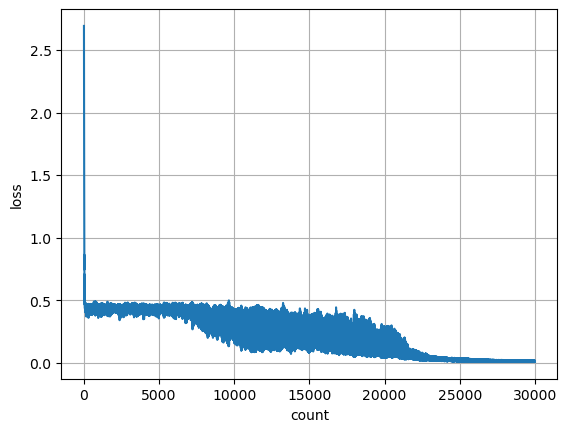

In [21]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
from tqdm import trange


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) #+ b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) #+ b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) #+ b3
    # print(a3)
    y = sigmoid (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 4
W2 = 5
W3 = 8
np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([3,W1])
# w1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(3, W1))
print(w1)
# print(w11)
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W1))
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
# w2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W1), size=(W1, W2))

#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W2))
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
# w3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W2), size=(W2, W3))

b3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W3))

#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.5
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 30000


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in trange(learn):
    in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss1 = sum_squared_error(out_y1,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss2 = sum_squared_error(out_y2,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

# print("------end_learning_result_network„Éª„Éª„Éª-------")
# pprint.pprint(Network)
# print("------endnetwork-------")
# print("ÊïôÂ∏´Ôºù" , teach)
# print("ÂÖ•ÂäõÔºù" , in_x)
# # A = change_one_hot(A)
# print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [23]:
#„Åü„Å†„ÅÆÊé®Ë´ñ
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

------endnetwork-------
[array([[0.15416284, 0.7400497 , 0.26331502],
       [1.08871784, 0.86445905, 1.35886949],
       [1.4556933 , 0.88330552, 1.39707182]]),
 array([[0.13720932, 0.28382835, 0.60608318]]),
 array([[2.0433628 , 2.2059322 , 1.41414358],
       [1.39611373, 1.60952318, 1.5972077 ],
       [1.90697315, 1.56680277, 2.2297522 ]]),
 array([[0.0208098 , 0.13521018, 0.11627302]]),
 array([[3.47438446, 3.27991625, 3.55564724, 3.39534504, 3.30362893,
        3.57055878, 3.6828042 , 3.45450478],
       [3.44846558, 3.56131237, 3.66265157, 3.50551987, 3.73827293,
        3.62805769, 3.34567669, 3.52948177],
       [3.46853228, 3.55087924, 3.17268763, 3.49120381, 3.34941011,
        3.19261354, 3.36286837, 3.40732798]]),
 array([[0.4655081 , 0.03516826, 0.08427267, 0.7325207 , 0.63619999,
        0.02790779, 0.30017006, 0.22085252]])]
ÊïôÂ∏´Ôºù [[0 1 0 0 0 0 0 0]]
ÂÖ•ÂäõÔºù [[0 0 1]]


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
w1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(3, W1))

#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1.4
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
# w2 = np.random.random([W1,W2])*1.4
w2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W1), size=(W1, W2))

#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1.4
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
# w3 = np.random.random([W2,W3])*1.4
w3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W2), size=(W2, W3))

b3 = np.random.random([1,W3])*1.4

print(w1)
print("----------------")
print(w2)
print("----------------")
print(w3)
print("----------------")


In [52]:
import numpy as np
import pprint


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list
    return network






w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
               [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
               [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]) #3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
               [0.2, 0.5, 0.1, 0.8, 0.1],
               [0.3, 0.6, 0.2, 0.5, 0.2],
               [0.2, 0.5, 0.4, 0.2, 0.3],
               [0.3, 0.6, 0.7, 0.3, 0.2],
               [0.2, 0.5, 0.3, 0.2, 0.5],
               [0.3, 0.6, 0.1, 0.1, 0.1],
               [0.2, 0.5, 0.1, 0.1, 0.2]]) #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
b2 = np.array([[0.1, 0.2, 0.2, 0.4, 0.4]])#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
w3 = np.array([[0.1, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1],
               [0.2, 0.2, 0.1, 0.2, 0.1, 0.4, 0.2, 0.4],
               [0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3, 0.7],
               [0.3, 0.4, 0.3, 0.4, 0.7, 0.3, 0.4, 0.7],
               [0.1, 0.1, 0.7, 0.1, 0.3, 0.2, 0.1, 0.2]]) #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
b3 = np.array([[0.3, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1, 0.3]]) #„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê

pprint.pprint(Network)










koubai_list1 = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]
koubai_list2 = np.array(koubai_list)






w1 = np.random.random([3,8])
b1 = np.random.random([1,8])
w2 = np.random.random([8,5])
b2 = np.random.random([1,5])
w3 = np.random.random([5,8])
b3 = np.random.random([1,8])

Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê

print("--------------------------------------------------")
pprint.pprint(Network)

print("--------------------------------------------------")
pprint.pprint(koubai_list1)

print("--------------------------------------------------")
pprint.pprint(koubai_list2)

[array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3],
       [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2],
       [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]),
 array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]]),
 array([[0.1, 0.4, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.1, 0.8, 0.1],
       [0.3, 0.6, 0.2, 0.5, 0.2],
       [0.2, 0.5, 0.4, 0.2, 0.3],
       [0.3, 0.6, 0.7, 0.3, 0.2],
       [0.2, 0.5, 0.3, 0.2, 0.5],
       [0.3, 0.6, 0.1, 0.1, 0.1],
       [0.2, 0.5, 0.1, 0.1, 0.2]]),
 array([[0.1, 0.2, 0.2, 0.4, 0.4]]),
 array([[0.1, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1],
       [0.2, 0.2, 0.1, 0.2, 0.1, 0.4, 0.2, 0.4],
       [0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3, 0.7],
       [0.3, 0.4, 0.3, 0.4, 0.7, 0.3, 0.4, 0.7],
       [0.1, 0.1, 0.7, 0.1, 0.3, 0.2, 0.1, 0.2]]),
 array([[0.3, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1, 0.3]])]
--------------------------------------------------
[array([[0.08757611, 0.33144714, 0.19544325, 0.25562551, 0.25996368,
        0.00265395, 0.41226291, 0.47811892],
       [0.17142531, 0

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 4
W2 = 4
W3 = 8


#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø

#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 1000


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss1 = sum_squared_error(out_y1,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss2 = sum_squared_error(out_y2,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



# ÔºïÊúàÔºëÔºôÊó•„ÄÄ„Åì„Åì„Åã„ÇâË™§Â∑ÆÈÄÜ‰ºùÊí≠„ÄÅMNIST„Å™„Å©„Çí„ÇÑ„Çã

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4]) #„ÄÄ„ÄÄ„ÄÄÂêçÂâç„ÅãÁï™Âè∑„ÅãËø∑„ÅÜ
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y, a1, z1, a2, z2, a3 #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú




def backward(network, in_x, y, teach, a1, z1, a2, z2, a3):
    # Âá∫ÂäõÂ±§„ÅÆË™§Â∑Æ
    delta3 = (y - teach)
    
    # Èö†„ÇåÂ±§2„ÅÆË™§Â∑Æ
    delta2 = np.dot(delta3, network[4].T) * (a2 > 0)
    
    # Èö†„ÇåÂ±§1„ÅÆË™§Â∑Æ
    delta1 = np.dot(delta2, network[2].T) * (a1 > 0)
    
    # Èáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÅÆÂãæÈÖç
    grad_w3 = np.dot(z2.T, delta3)
    grad_b3 = np.sum(delta3, axis=0)
    grad_w2 = np.dot(z1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_w1 = np.dot(in_x.T, delta1)
    grad_b1 = np.sum(delta1, axis=0)
    
    return [grad_w1, grad_b1, grad_w2, grad_b2, grad_w3, grad_b3]






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 8
W2 = 8
W3 = 8


#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([3,W1])*0.3

#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*0.3
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*0.3

#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*0.3
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*0.3
b3 = np.random.random([1,W3])*0.3

#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü

                out_y, a1, z1, a2, z2, a3 = forward(Network, in_x)
                loss1 = sum_squared_error(out_y,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                gradients = backward(Network, in_x, out_y, teach, a1, z1, a2, z2, a3)

                for j in range(len(Network)):
                    Network[j] -= gradients[j] * learning_rate
    # out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆË™≠„ÅøËæº„Åø

    Parameters
    ----------
    normalize : ÁîªÂÉè„ÅÆ„Éî„ÇØ„Çª„É´ÂÄ§„Çí0.0~1.0„Å´Ê≠£Ë¶èÂåñ„Åô„Çã
    one_hot_label :
        one_hot_label„ÅåTrue„ÅÆÂ†¥Âêà„ÄÅ„É©„Éô„É´„ÅØone-hotÈÖçÂàó„Å®„Åó„Å¶Ëøî„Åô
        one-hotÈÖçÂàó„Å®„ÅØ„ÄÅ„Åü„Å®„Åà„Å∞[0,0,1,0,0,0,0,0,0,0]„ÅÆ„Çà„ÅÜ„Å™ÈÖçÂàó
    flatten : ÁîªÂÉè„Çí‰∏ÄÊ¨°ÂÖÉÈÖçÂàó„Å´Âπ≥„Å´„Åô„Çã„Åã„Å©„ÅÜ„Åã

    Returns
    -------
    (Ë®ìÁ∑¥ÁîªÂÉè, Ë®ìÁ∑¥„É©„Éô„É´), („ÉÜ„Çπ„ÉàÁîªÂÉè, „ÉÜ„Çπ„Éà„É©„Éô„É´)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()

# MNIST„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åó„Å¶Ë™≠„ÅøËæº„ÇÄ

In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "."
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆË™≠„ÅøËæº„Åø

    Parameters
    ----------
    normalize : ÁîªÂÉè„ÅÆ„Éî„ÇØ„Çª„É´ÂÄ§„Çí0.0~1.0„Å´Ê≠£Ë¶èÂåñ„Åô„Çã
    one_hot_label :
        one_hot_label„ÅåTrue„ÅÆÂ†¥Âêà„ÄÅ„É©„Éô„É´„ÅØone-hotÈÖçÂàó„Å®„Åó„Å¶Ëøî„Åô
        one-hotÈÖçÂàó„Å®„ÅØ„ÄÅ„Åü„Å®„Åà„Å∞[0,0,1,0,0,0,0,0,0,0]„ÅÆ„Çà„ÅÜ„Å™ÈÖçÂàó
    flatten : ÁîªÂÉè„Çí‰∏ÄÊ¨°ÂÖÉÈÖçÂàó„Å´Âπ≥„Å´„Åô„Çã„Åã„Å©„ÅÜ„Åã

    Returns
    -------
    (Ë®ìÁ∑¥ÁîªÂÉè, Ë®ìÁ∑¥„É©„Éô„É´), („ÉÜ„Çπ„ÉàÁîªÂÉè, „ÉÜ„Çπ„Éà„É©„Éô„É´)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()

In [ ]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
from PIL import Image



load_mnist()


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # Ë¶™„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ„Éï„Ç°„Ç§„É´„Çí„Ç§„É≥„Éù„Éº„Éà„Åô„Çã„Åü„ÇÅ„ÅÆË®≠ÂÆö
import numpy as np
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # ÂΩ¢Áä∂„ÇíÂÖÉ„ÅÆÁîªÂÉè„Çµ„Ç§„Ç∫„Å´Â§âÂΩ¢
print(img.shape)  # (28, 28)

img_show(img)

print(x_train)
print(t_train)

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 60000
W1 = 8
W2 = 8
W3 = 784


w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1





#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø

#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 10


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,x_train)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss1 = sum_squared_error(out_y1,t_train) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2,x_train)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss2 = sum_squared_error(out_y2,t_train) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    out3 = forward(Network, x_test)
    loss = sum_squared_error(out3,t_test)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,x_test)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , t_test)
print("ÂÖ•ÂäõÔºù" , x_test)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.3
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 200
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss1 = sum_squared_error(out_y1,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss2 = sum_squared_error(out_y2,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                kaisuu += 1
                print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [ ]:
print(x_train.shape)

# „Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„ÇíËøΩÂä†„Åô„Çã

### ‚Üì„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫3„ÅÆ„Åπ„ÅüÊõ∏„Åç„Ç≥„Éº„Éâ

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 1500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x2, teach2 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x3, teach3 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x4, teach4 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x5, teach5 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x6, teach6 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x7, teach7 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x8, teach8 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x9, teach9 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x10, teach10 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])

                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out2_y1 = forward(Network1,in_x2)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out3_y1 = forward(Network1,in_x3)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã


                loss1_1 = sum_squared_error(out_y1,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_2 = sum_squared_error(out2_y1,teach2) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_3 = sum_squared_error(out3_y1,teach3) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1 = (loss1_1 + loss1_2 + loss1_3)/3 #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó


                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out2_y2 = forward(Network2,in_x2)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out3_y2 = forward(Network2,in_x3)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã

                loss2_1 = sum_squared_error(out_y2,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_2 = sum_squared_error(out2_y2,teach2) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_3 = sum_squared_error(out3_y2,teach3) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2 = (loss2_1 + loss2_2 + loss2_3)/3 #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                # kaisuu += 1
                # print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [ ]:
#„Åü„Å†„ÅÆÊé®Ë´ñ
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

#### „Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫Â¢ó„ÇÑ„Åó„ÅüÁâà

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
np.random.seed(49)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x2, teach2 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x3, teach3 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x4, teach4 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x5, teach5 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x6, teach6 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x7, teach7 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x8, teach8 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x9, teach9 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    in_x10, teach10 = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])

                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out2_y1 = forward(Network1,in_x2)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out3_y1 = forward(Network1,in_x3)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out4_y1 = forward(Network1,in_x4)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out5_y1 = forward(Network1,in_x5)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out6_y1 = forward(Network1,in_x6)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out7_y1 = forward(Network1,in_x7)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out8_y1 = forward(Network1,in_x8)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out9_y1 = forward(Network1,in_x9)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out10_y1 = forward(Network1,in_x10)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã

                loss1_1 = sum_squared_error(out_y1,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_2 = sum_squared_error(out2_y1,teach2) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_3 = sum_squared_error(out3_y1,teach3) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_4 = sum_squared_error(out4_y1,teach4) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_5 = sum_squared_error(out5_y1,teach5) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_6 = sum_squared_error(out6_y1,teach6) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_7 = sum_squared_error(out7_y1,teach7) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_8 = sum_squared_error(out8_y1,teach8) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_9 = sum_squared_error(out9_y1,teach9) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1_10 = sum_squared_error(out10_y1,teach10) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss1 = (loss1_1 + loss1_2 + loss1_3 + loss1_4 + loss1_5 + loss1_6 + loss1_7 + loss1_8 + loss1_9 + loss1_10)/10 #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó



                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out2_y2 = forward(Network2,in_x2)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out3_y2 = forward(Network2,in_x3)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out4_y2 = forward(Network2,in_x4)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out5_y2 = forward(Network2,in_x5)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out6_y2 = forward(Network2,in_x6)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out7_y2 = forward(Network2,in_x7)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out8_y2 = forward(Network2,in_x8)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out9_y2 = forward(Network2,in_x9)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                out10_y2 = forward(Network2,in_x10)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã

                loss2_1 = sum_squared_error(out_y2,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_2 = sum_squared_error(out2_y2,teach2) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_3 = sum_squared_error(out3_y2,teach3) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_4 = sum_squared_error(out4_y2,teach4) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_5 = sum_squared_error(out5_y2,teach5) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_6 = sum_squared_error(out6_y2,teach6) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_7 = sum_squared_error(out7_y2,teach7) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_8 = sum_squared_error(out8_y2,teach8) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_9 = sum_squared_error(out9_y2,teach9) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2_10 = sum_squared_error(out10_y2,teach10) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                loss2 = (loss2_1 + loss2_2 + loss2_3 + loss2_4 + loss2_5 + loss2_6 + loss2_7 + loss2_8 + loss2_9 + loss2_10)/10 #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                # kaisuu += 1
                # print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



#### ‚Üì„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„Çí„Åô„ÅêÊåáÂÆö„Åß„Åç„Çã„Çà„ÅÜ„Å´ÈÖçÂàó„Çí‰Ωø„Å£„Åü„Ç≥„Éº„Éâ„Å´Â§âÊõ¥

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 400
kaisuu = 0
#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíË®≠ÂÆö
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ÂàÜ„ÅÆÂÖ•Âäõ„Éá„Éº„Çø‰ΩúÊàê„Åó„Å¶„É™„Çπ„Éà„Å´Âèé„ÇÅ„Çã
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                    loss1 = lossbatch1/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                    loss2 = lossbatch2/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    #‰Ωú„Å£„Åü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊÄßËÉΩÊ§úË®ºÔºà„Åü„Å†„ÅÆÈ†Ü‰ºùÊí≠„Çí„Åô„ÇãÔºâ
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2‚Üí10ÈÄ≤Êï∞Â§âÊèõ", fontsize=23)
plt.xlabel('Â≠¶ÁøíÂõûÊï∞/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.xlim(0, 250) # XËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.ylim(0, 0.9) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.xticks([0, 350, 500, 700]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.yticks([0, 0.3, 0.6, 0.9]) # YËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö

plt.tight_layout() #„Ç∞„É©„Éï„Åå„ÅØ„ÅøÂá∫„Å™„ÅÑ„Çà„ÅÜ„Å´„ÅÜ„Åæ„ÅèË™øÊï¥„Åó„Å¶„Åè„Çå„Çã
plt.grid()
plt.show()
print(dir(plt))






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [ ]:
#„Åü„Å†„ÅÆÊé®Ë´ñ
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

In [ ]:
BATCH_SIZE = 10
# out_y1=np.zeros(shape=(BATCH_SIZE,1,2))
print(out_y1)
print(out_y1)
p = forward(Network1,in_x[batch_out1])
print(p)
p.shape
# print(in_x)
# dfd,deed = make_input()
# print(dfd)
# print(deed)
# print(teach)

# ÊêçÂ§±Èñ¢Êï∞„ÇíË°®Á§∫

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
# np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö
np.random.seed(4)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.7
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 550
kaisuu = 0
#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíË®≠ÂÆö
BATCH_SIZE = 1

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

# #Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
# for i in range(learn):
#     for batch_in in range(BATCH_SIZE):

#         in_x[batch_in], teach[batch_in] = make_input()#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ÂàÜ„ÅÆÂÖ•Âäõ„Éá„Éº„Çø‰ΩúÊàê„Åó„Å¶„É™„Çπ„Éà„Å´Âèé„ÇÅ„Çã
    
#     for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
#         for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
#             for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

#                 Network1 = Network.copy()

#                 Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                
#                 for batch_out1 in range(BATCH_SIZE):
#                     out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
#                     # print(out_y1[batch_out1])
#                     lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
#                     loss1 = lossbatch1/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
#                 lossbatch1 = 0

#                 Network2 = Network.copy()
#                 Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
#                 for batch_out2 in range(BATCH_SIZE):
#                     out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
#                     lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
#                     loss2 = lossbatch2/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
#                 lossbatch2 = 0

#                 koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ
#                 # print("koubai=")
#                 # print(koubai)

#                 koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
#         Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

#     #‰Ωú„Å£„Åü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊÄßËÉΩÊ§úË®ºÔºà„Åü„Å†„ÅÆÈ†Ü‰ºùÊí≠„Çí„Åô„ÇãÔºâ
#     in_x_pre, teach_pre = make_input()
#     out3 = forward(Network, in_x_pre)
#     loss = sum_squared_error(out3,teach_pre)    
#     COUNT.append(i)
#     LOSS.append(loss)
#     lossbatch1 = 0
#     lossbatch2 = 0

# A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
# print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2‚Üí10ÈÄ≤Êï∞Â§âÊèõ", fontsize=23)
plt.xlabel('Â≠¶ÁøíÂõûÊï∞/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.xlim(0, 250) # XËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.ylim(0, 0.9) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.xticks([0, 350, 500, 700]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.yticks([0, 0.3, 0.6, 0.9]) # YËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö

plt.tight_layout() #„Ç∞„É©„Éï„Åå„ÅØ„ÅøÂá∫„Å™„ÅÑ„Çà„ÅÜ„Å´„ÅÜ„Åæ„ÅèË™øÊï¥„Åó„Å¶„Åè„Çå„Çã
plt.grid()
plt.show()
print(dir(plt))






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã


def make_input0():
    x0 = 0
    x1 = 0
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach





def make_input1():
    x0 = 0
    x1 = 0
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

def make_input2():
    x0 = 0
    x1 = 1
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

def make_input3():
    x0 = 0
    x1 = 1
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach







def make_input4():
    x0 = 1
    x1 = 0
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach




def make_input5():
    x0 = 1
    x1 = 0
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach




def make_input6():
    x0 = 1
    x1 = 1
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach





def make_input7():
    x0 = 1
    x1 = 1
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach






IN = 3
W1 = 4
W2 = 5
W3 = 8
# np.random.seed(49)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
# w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
# b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
# w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
# b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
# w3 = np.random.random([W2,W3])*1
# b3 = np.random.random([1,W3])*1



# #Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
# learning_rate = 0.8
# #Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
# learn = 350
# kaisuu = 0
# #„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíË®≠ÂÆö
# BATCH_SIZE = 2

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)


GRAPH_COUNT = 2000
#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 0.01#0.01
# 
# graph_w1 = np.arange(0, GRAPH_COUNT/100, 0.01) #0„Åã„Çâ/10„Åæ„Åß„ÄÅ0.01ÈñìÈöî„ÅßÈÖçÂàó„Çí‰ΩúÊàê

nyuuryoku0 = np.full(GRAPH_COUNT, 0)
nyuuryoku1 = np.full(GRAPH_COUNT, 1)
nyuuryoku2 = np.full(GRAPH_COUNT, 2)
nyuuryoku3 = np.full(GRAPH_COUNT, 3)
nyuuryoku4 = np.full(GRAPH_COUNT, 4)
nyuuryoku5 = np.full(GRAPH_COUNT, 5)
nyuuryoku6 = np.full(GRAPH_COUNT, 6)
nyuuryoku7 = np.full(GRAPH_COUNT, 7)
graphloss = np.array([])
graph_w_1 = np.array([])
graph_w_2 = np.array([])
graph_w_3 = np.array([])
# graphloss = np.empty(0) # = []„ÅÆnumpyÁâà

# Network1[param][gyou][retsu] += 0.1

# out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
# loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
# np.append = (graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Çí‰Ωú„Çã

# draw_graph(nyuuryoku0 , graph_w1 , graphloss)





Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]


# Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ


in_x ,teach = make_input0()
Network1 = Network.copy()
Network1[4][2][2] -= 50*0.2
for p in range(GRAPH_COUNT):

    Network1[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_1 = np.append(graph_w_1, Network1[4][2][2])
    out_y1 = forward(Network1,in_x) #„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach) #Ë™§Â∑ÆË®àÁÆó
    graphloss = np.append(graphloss, loss1) #„Åù„Çå„Çíloss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("Title", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_1, graphloss, label="input_0",)
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.show()
print(graph_w_1)
graphloss = np.array([])
graph_w_1 = np.array([])
print(graph_w_1)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


######################################################################################################################



in_x ,teach = make_input1()
Network1 = Network.copy()
Network1[4][2][2] -= 100*0.2
for p in range(GRAPH_COUNT):

    Network1[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_1 = np.append(graph_w_1, Network1[4][2][2])
    out_y1 = forward(Network1,in_x) #„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach) #Ë™§Â∑ÆË®àÁÆó
    graphloss = np.append(graphloss, loss1) #„Åù„Çå„Çíloss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("Title", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_1, graphloss, label="input_1")
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.show()
print(graph_w_1)
graphloss = np.array([])
graph_w_1 = np.array([])
print(graph_w_1)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)

######################################################################################################################
in_x ,teach = make_input2()
Network2 = Network.copy()
Network2[4][2][2] -= 100*0.2
for i in range(GRAPH_COUNT):

    Network2[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_2 = np.append(graph_w_2, Network2[4][2][2])
    # print("Network2=") 
    # pprint.pprint(Network2)
    out_y1 = forward(Network2,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("Title", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_2, graphloss, label="input_2")
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.show()
print(graph_w_2)
graphloss = np.array([])
graph_w_2 = np.array([])
print(graph_w_2)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################

in_x ,teach = make_input3()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("Title", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_3, graphloss, label="input_3")
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input4()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("Title", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_3, graphloss, label="input_4")
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input5()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("Title", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_3, graphloss, label="input_5")
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input6()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("Title", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_3, graphloss, label="input_6")
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################




in_x ,teach = make_input7()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
    loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†

# plt.xticks([0, 50, 100]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.title("2‚Üí10ÈÄ≤Êï∞Â§âÊèõ„ÅÆÂãæÈÖçÊõ≤Èù¢(Ê®™„Åã„Çâ„Åø„ÅüÂõ≥)", fontsize=23)
plt.xlabel('w„ÅÆÂÄ§', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.plot(graph_w_3, graphloss, label="input_7")
plt.ylim(0, 1.2) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
# plt.xlim(-300, 300) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.plot(0,0,marker='8', color= "blue", markersize=10)
plt.legend()
plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################





















# #Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
# for i in range(learn):
#     for batch_in in range(BATCH_SIZE):

#         in_x[batch_in], teach[batch_in] = make_input()#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ÂàÜ„ÅÆÂÖ•Âäõ„Éá„Éº„Çø‰ΩúÊàê„Åó„Å¶„É™„Çπ„Éà„Å´Âèé„ÇÅ„Çã
    
#     for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
#         for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
#             for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

#                 Network1 = Network.copy()

#                 Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                
#                 for batch_out1 in range(BATCH_SIZE):
#                     out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
#                     # print(out_y1[batch_out1])
#                     lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
#                     loss1 = lossbatch1/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
#                 lossbatch1 = 0

#                 Network2 = Network.copy()
#                 Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
#                 for batch_out2 in range(BATCH_SIZE):
#                     out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
#                     lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
#                     loss2 = lossbatch2/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
#                 lossbatch2 = 0

#                 koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ
#                 # print("koubai=")
#                 # print(koubai)

#                 koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
#         Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

#     #‰Ωú„Å£„Åü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊÄßËÉΩÊ§úË®ºÔºà„Åü„Å†„ÅÆÈ†Ü‰ºùÊí≠„Çí„Åô„ÇãÔºâ
#     in_x_pre, teach_pre = make_input()
#     out3 = forward(Network, in_x_pre)
#     loss = sum_squared_error(out3,teach_pre)    
#     COUNT.append(i)
#     LOSS.append(loss)

# A = forward(Network,in_x_pre)

# print("------endnetwork-------")
# pprint.pprint(Network)
# print("ÊïôÂ∏´Ôºù" , teach)
# print("ÂÖ•ÂäõÔºù" , in_x)
# # A = change_one_hot(A)
# print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))




# for i in range(GRAPH_COUNT):

#     Network1 = Network.copy()

#     Network1[0][0][0] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã 
#     out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
#     loss1 = sum_squared_error(out_y1,teach)#Ë™§Â∑ÆË®àÁÆó
#     np.append = (graphloss, loss1) #loss„ÅÆ„É™„Çπ„Éà„Å´ËøΩÂä†


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)









# plt.plot(COUNT, LOSS)
# plt.xlabel("count")
# plt.ylabel("loss")
# plt.grid()
# plt.show()






#     # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
#     # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
#     # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
#     # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

#     # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

#     # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

#     # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)+ np.cos(Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

In [ ]:
import numpy as np

hoge =np.array([])
np.append(hoge, 1)

In [ ]:
print(np.append([-3, -2, -1], 1))
# [-3 -2 -1  0  1  2

# „Åî„Å°„ÇÉ„Åî„Å°„ÇÉ„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÊï¥È†ì

In [ ]:
import numpy as np
import pprint
# import matplotlibÔΩû„ÅÆÂâç„Å´ÔºÅ
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    
    ####################
    # a„ÅØ„Åù„ÅÆÂ±§„ÅÆÂÖ•Âäõ„ÅÆÂíå„ÅÆ„Åì„Å®„Åß„Åô
    # b„ÅØ„Éê„Ç§„Ç¢„Çπ„ÅÆ„Åì„Å®„Åß„Åô
    # z„ÅØÂá∫Âäõ„Åß„Åô

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    print(a1)
    print(in_x)
    y = softmax (a3)

    return y , W1, W2, W3, b1, b2, b3, #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 400
kaisuu = 0
#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíË®≠ÂÆö
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ÂàÜ„ÅÆÂÖ•Âäõ„Éá„Éº„Çø‰ΩúÊàê„Åó„Å¶„É™„Çπ„Éà„Å´Âèé„ÇÅ„Çã
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                    loss1 = lossbatch1/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                    loss2 = lossbatch2/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    #‰Ωú„Å£„Åü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊÄßËÉΩÊ§úË®ºÔºà„Åü„Å†„ÅÆÈ†Ü‰ºùÊí≠„Çí„Åô„ÇãÔºâ
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2‚Üí10ÈÄ≤Êï∞Â§âÊèõ", fontsize=23)
plt.xlabel('Â≠¶ÁøíÂõûÊï∞/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.xlim(0, 250) # XËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.ylim(0, 0.9) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.xticks([0, 350, 500, 700]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.yticks([0, 0.3, 0.6, 0.9]) # YËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö

plt.tight_layout() #„Ç∞„É©„Éï„Åå„ÅØ„ÅøÂá∫„Å™„ÅÑ„Çà„ÅÜ„Å´„ÅÜ„Åæ„ÅèË™øÊï¥„Åó„Å¶„Åè„Çå„Çã
plt.grid()
plt.show()


Network1 = Network.copy()



In [ ]:
AEL = 3
B= np.array([[10,10,-20, 10],[-20,10,20,20],[5,2,2]])

In [ ]:
import numpy as np

a = np.array([1, 2])

b = np.array([4, 3])

f = np.dot(a, b) # „Åæ„Åö„ÅØÔºíÊ¨°ÂÖÉ„Éô„ÇØ„Éà„É´ÂêåÂ£´„ÅÆÂÜÖÁ©ç„Åã„Çâ„ÄÇ
print(f)
s = np.dot(a, a) # „Åì„Çå„Åß„Éô„ÇØ„Éà„É´„ÅÆ„Éé„É´„É†„ÅÆÔºí‰πó„ÅåÂá∫„Çã„ÄÇ
print(s)

# Ë™§Â∑ÆÈÄÜ‰ºùÊí≠„Åô„Çã„Åû„ÄÄ„Åæ„Å†„Åß„Åç„Å¶„Å™„ÅÑ

In [ ]:
import numpy as np
import pprint
# import matplotlibÔΩû„ÅÆÂâç„Å´ÔºÅ
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    
    ##############################
    # a„ÅØ„Åù„ÅÆÂ±§„ÅÆÂÖ•Âäõ„ÅÆÂíå„ÅÆ„Åì„Å®„Åß„Åô
    # b„ÅØ„Éê„Ç§„Ç¢„Çπ„ÅÆ„Åì„Å®„Åß„Åô
    # z„ÅØÂá∫Âäõ„Åß„Åô
    # w„ÅØÈáç„Åø
    ##############################

    z1 = np.dot(in_x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y = softmax (z3)

    return y, W1, W2, W3, b1, b2, b3, a1, a2, z1, z2, z3 #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 400
kaisuu = 0
#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíË®≠ÂÆö
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ÂàÜ„ÅÆÂÖ•Âäõ„Éá„Éº„Çø‰ΩúÊàê„Åó„Å¶„É™„Çπ„Éà„Å´Âèé„ÇÅ„Çã
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                    loss1 = lossbatch1/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
                    loss2 = lossbatch2/BATCH_SIZE #„Éü„Éã„Éê„ÉÉ„ÉÅÂá¶ÁêÜ„Çí„Åô„Çã„Åü„ÇÅ„Å´Ë™§Â∑ÆÂπ≥Âùá„ÇíË®àÁÆó
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    #‰Ωú„Å£„Åü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊÄßËÉΩÊ§úË®ºÔºà„Åü„Å†„ÅÆÈ†Ü‰ºùÊí≠„Çí„Åô„ÇãÔºâ
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2‚Üí10ÈÄ≤Êï∞Â§âÊèõ", fontsize=23)
plt.xlabel('Â≠¶ÁøíÂõûÊï∞/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.ylabel('ÊêçÂ§±/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlib„Çí‰ΩøÁî®„Åô„Çã
plt.xlim(0, 250) # XËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.ylim(0, 0.9) # YËª∏„ÅÆÁØÑÂõ≤„ÇíÊåáÂÆö
plt.xticks([0, 350, 500, 700]) # XËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö
plt.yticks([0, 0.3, 0.6, 0.9]) # YËª∏„ÅÆÁõÆÁõõ„Çä„ÇíÊåáÂÆö

plt.tight_layout() #„Ç∞„É©„Éï„Åå„ÅØ„ÅøÂá∫„Å™„ÅÑ„Çà„ÅÜ„Å´„ÅÜ„Åæ„ÅèË™øÊï¥„Åó„Å¶„Åè„Çå„Çã
plt.grid()
plt.show()


Network1 = Network.copy()



In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    z1 = np.dot(in_x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    # print(a3)
    y = softmax (z3)

    return y, W1, W2, W3, b1, b2, b3, z1, z2, z3, a1, a2 #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.8
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 1500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ

in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê

out_y1 = forward(Network,in_x)#È†Ü‰ºùÊí≠„ÄÅËøî„ÇäÂÄ§Ôºö12ÂÄã„ÅÆ„Éë„É©„É°„Éº„Çø y,w123,b123,z123,a12„ÅÆÈ†Ü
# print(type(out_y1))
# print("out_y1=")
# pprint.pprint(out_y1)

#ÂÅèÂæÆÂàÜ‰øÇÊï∞„ÇíÊ±Ç„ÇÅ„Çã
loss1 = sum_squared_error(out_y1,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ


koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

out3 = forward(Network, in_x)
loss = sum_squared_error(out3,teach)    
COUNT.append(i)
LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



# Ë™§Â∑ÆÈÄÜ‰ºùÊí≠„Åß„Åç„Å™„ÅÑ„Åã„Çâ„ÄÅÂ∑•Â§´„Å™„ÅèMNIST„Åó„Å¶„Åø„Çã

In [ ]:
##############################################################################################################
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "."
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆË™≠„ÅøËæº„Åø

    Parameters
    ----------
    normalize : ÁîªÂÉè„ÅÆ„Éî„ÇØ„Çª„É´ÂÄ§„Çí0.0~1.0„Å´Ê≠£Ë¶èÂåñ„Åô„Çã
    one_hot_label :
        one_hot_label„ÅåTrue„ÅÆÂ†¥Âêà„ÄÅ„É©„Éô„É´„ÅØone-hotÈÖçÂàó„Å®„Åó„Å¶Ëøî„Åô
        one-hotÈÖçÂàó„Å®„ÅØ„ÄÅ„Åü„Å®„Åà„Å∞[0,0,1,0,0,0,0,0,0,0]„ÅÆ„Çà„ÅÜ„Å™ÈÖçÂàó
    flatten : ÁîªÂÉè„Çí‰∏ÄÊ¨°ÂÖÉÈÖçÂàó„Å´Âπ≥„Å´„Åô„Çã„Åã„Å©„ÅÜ„Åã

    Returns
    -------
    (Ë®ìÁ∑¥ÁîªÂÉè, Ë®ìÁ∑¥„É©„Éô„É´), („ÉÜ„Çπ„ÉàÁîªÂÉè, „ÉÜ„Çπ„Éà„É©„Éô„É´)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return dataset['train_img'], dataset['train_label'], dataset['test_img'], dataset['test_label']


if __name__ == '__main__':
    init_mnist()

    # coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
from PIL import Image



load_mnist()

##############################################################################################################



import numpy as np
import pprint
import matplotlib.pyplot as plt


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)


def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach


x_train, t_train, x_test, t_test = load_mnist(flatten=True, normalize=True, one_hot_label=True)




IN = 784
W1 = 5
W2 = 7
W3 = 10
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])*1
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])*1
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.3
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 200
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range(learn):
    in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,x_train)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss1 = sum_squared_error(out_y1,t_train) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2, x_train)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss2 = sum_squared_error(out_y2,t_train) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                kaisuu += 1
                print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞

    out3 = forward(Network, x_test)
    loss = sum_squared_error(out3,t_test)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("ÊïôÂ∏´Ôºù" , teach)
print("ÂÖ•ÂäõÔºù" , in_x)
# A = change_one_hot(A)
print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=True)

# Ë™§Â∑ÆÈÄÜ‰ºùÊí≠ÂÆüÈ®ì
## ‚ë†È†Ü‰ºùÊí≠„Åó„Å¶„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè„Åô„Çã

![„Çπ„ÇØ„É™„Éº„É≥„Ç∑„Éß„ÉÉ„Éà 2023-06-26 174333.png](<attachment:„Çπ„ÇØ„É™„Éº„É≥„Ç∑„Éß„ÉÉ„Éà 2023-06-26 174333.png>)

In [ ]:
# ÂÖ•ÂäõÔºì„Åì„ÄÅÈö†„ÇåÂ±§ÔºëÂ±§ÁõÆÔºìÂÄã„ÄÅÈö†„Çå„Åù„ÅÜÔºíÂ±§ÁõÆÔºìÂÄã„ÄÅÂá∫ÂäõÂ±§ÔºíÂÄã
import pprint
import numpy as np
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2, fz3]
    return Z_ALL, FZ_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 3
W2 = 3
W3 = 2

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]


![„Çπ„ÇØ„É™„Éº„É≥„Ç∑„Éß„ÉÉ„Éà 2023-06-26 174333.png](<attachment:„Çπ„ÇØ„É™„Éº„É≥„Ç∑„Éß„ÉÉ„Éà 2023-06-26 174333.png>)
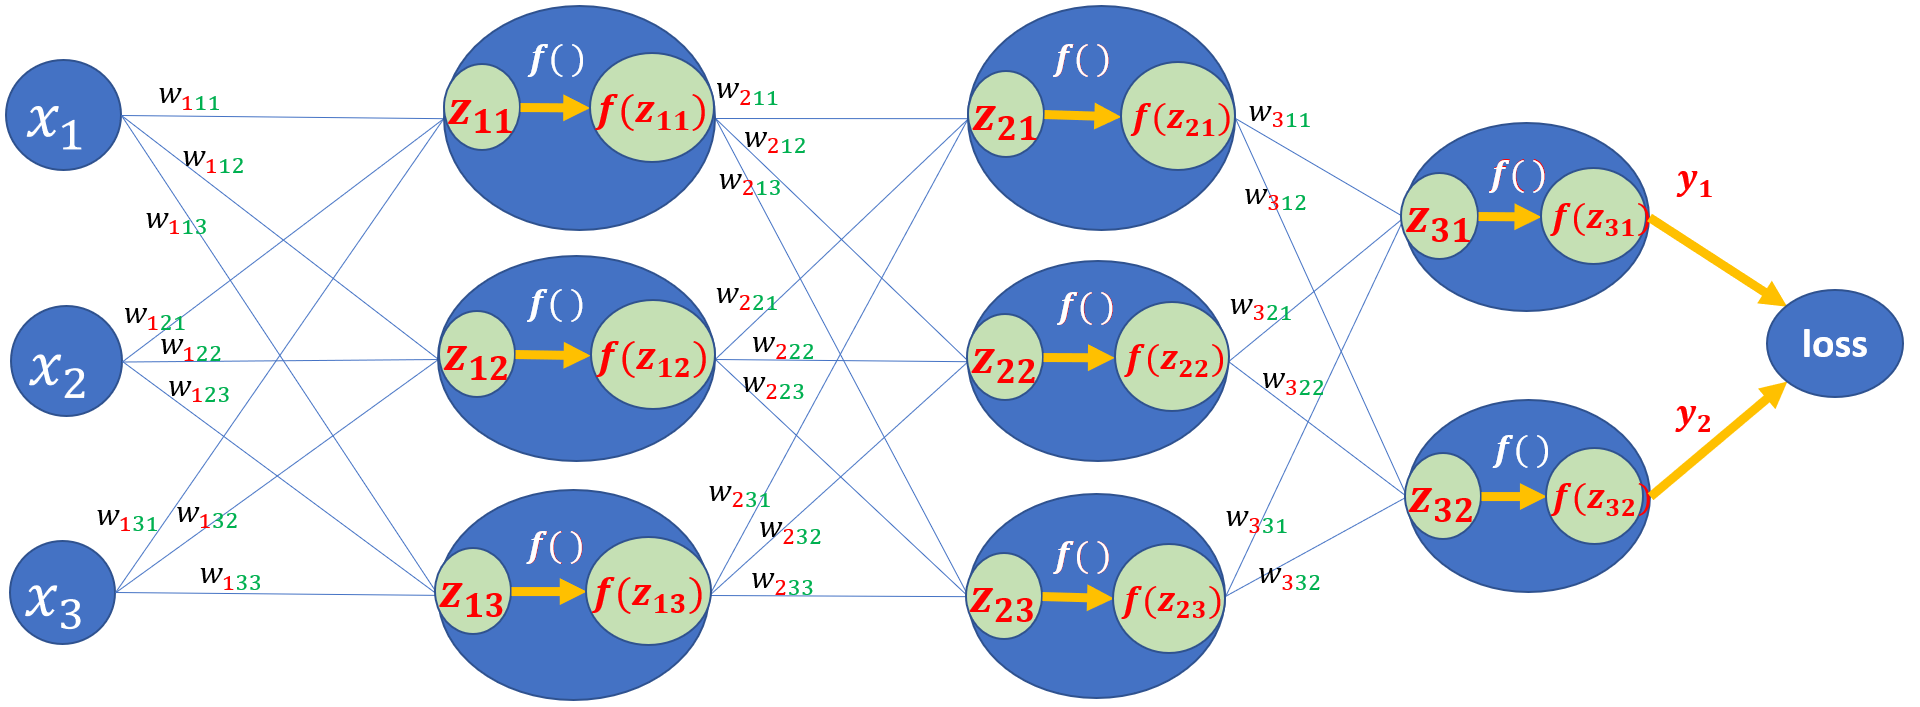

## ‚ë°ÈÄÜ‰ºùÊí≠„Åô„Çã„ÄÄ

In [ ]:
# ### ÈÄÜ‰ºùÊí≠Ë®àÁÆó„Çí„Åô„Çã„Åü„ÇÅ„Å´Ëª¢ÂÄ§„Çí„Åó„Åü„Çä„Åó„Å¶ÂΩ¢„Çí„Åù„Çç„Åà„Çã „ÄÄ„Åì„Åì„Åß„ÅØËª¢Âú∞„Åó„Å¶„Çã„Åë„Å©ÔºåÂ§âÂæÆÂàÜ„Åô„Çã„Å®„Åç„Å´Ëª¢Âú∞„Åô„Çã„Åã„ÇâÊÑèÂë≥„Åå„Å™„ÅÑ„ÅÆ„Åß„Åì„Çå„ÅØÂÆüË°å„Åó„Å™„ÅÑ

# print('z1=')
# pprint.pprint(z1)
# print('z1t=')
# z1t = np.transpose(z1)
# pprint.pprint(z1t)
# print('z1shape=')
# print(z1.shape)
# print('z1tshape=')
# print(z1t.shape)


# print('fz1=')
# pprint.pprint(fz1)
# print('fz1t=')
# fz1t = np.transpose(fz1)
# pprint.pprint(fz1t)
# print('fz1shape=')
# print(fz1.shape)
# print('fz1tshape=')
# print(fz1t.shape)


# print('z2=')
# pprint.pprint(z2)
# print('z2t=')
# z2t = np.transpose(z2)
# pprint.pprint(z2t)
# print('z2shape=')
# print(z2.shape)
# print('z2tshape=')
# print(z2t.shape)


# print('fz2=')
# pprint.pprint(fz2)
# print('fz2t=')
# fz2t = np.transpose(fz2)
# pprint.pprint(fz2t)
# print('fz2shape=')
# print(fz2.shape)
# print('fz2tshape=')
# print(fz2t.shape)


# print('z3=')
# pprint.pprint(z3)
# print('z3t=')
# z3t = np.transpose(z3)
# pprint.pprint(z3t)
# print('z3shape=')
# print(z3.shape)
# print('z3tshape=')
# print(z3t.shape)


# print('fz3=')
# pprint.pprint(fz3_y)
# print('fz3t=')
# fz3t = np.transpose(fz3_y)
# pprint.pprint(fz3t)
# print('fz3shape=')
# print(fz3_y.shape)
# print('fz3tshape=')
# print(fz3t.shape)


# print('teach')
# pprint.pprint(teach)
# print('teacht=')
# teacht = np.transpose(teach)
# pprint.pprint(teacht)
# print('teachshape=')
# print(teach.shape)
# print('teachtshape=')
# print(teacht.shape)

In [ ]:
from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print(circle)

    return circle


# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    # print(len(FZ[layer_num]))
    # print(len(FZ[layer_num]))
    # print(Z[layer_num][0]) #layer_numÁï™ÁõÆ„ÅÆÔºåÔºêÁï™ÁõÆ„Å´ÔΩÜÔΩö„ÅÆÂÄ§„ÅåÊ†ºÁ¥ç„Åï„Çå„Å¶„ÅÑ„Çã
    # print(len(Z[layer_num][0]))
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    print("start‚ñ≤", triangle)
    # pprint.pprint(FZ)
    # pprint.pprint(Z)
    # pprint.pprint(triangle)
    # print(len(FZ))
    for gyou in range(len(FZ[layer_num][0])):
        # print("„Å™„Åã")
        # print((FZ[layer_num]))
        # pprint.pprint(triangle[0])
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
        # pprint.pprint(triangle)
    print("fin‚ñ≤", triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÂÅèÂæÆÂàÜÂá¶ÁêÜ„ÇíË°å„Å£„Åü„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã Â§ß‰∫ãÔºÅÔºÅ
    print("star")
    pprint.pprint(star)
    return star


# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, ):
    square = np.zeros((len(W_ALL[layer_num][0]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    for square_gyou in range(len(W_ALL[layer_num][0])): 
        print("len(W_ALL[layer_num][0]) = ", len(W_ALL[layer_num][0]))
        print("(W_ALL[layer_num][0][0]) = ", (W_ALL[layer_num][0]))
        for square_retsu in range(len(W_ALL[layer_num][0][0])): #‰ªäË¶ã„Å¶„ÇãÈáç„Åø„ÅÆÂ±§„ÅÆÔºå0Áï™ÁõÆ„ÅÆÈï∑„Åï„Å§„Åæ„ÇäË°åÊï∞„ÇíÂèñÂæó„ÄÄ„Åù„ÅÆÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
            print("Á¢∫Ë™ç", square_retsu, "ÂõûÁõÆ„ÅÆ„É´„Éº„Éó„Åß„Åô")
            print("FZ_ALL")
            pprint.pprint(FZ_ALL)
            # print(FZ_ALL[layer_num][square_retsu])
            print(FZ_ALL[layer_num][0][square_retsu])
            fzt = np.transpose(FZ_ALL[layer_num][0][square_retsu]) #ÊåáÂÆö„ÅÆÔºà‰ªäË¶ã„Å¶„ÇãÔºâfz„ÅÆnË°åÁõÆ„ÇíËª¢ÂÄ§„Åó„Åü„ÇÇ„ÅÆ„ÇíÂèñ„ÇäÂá∫„Åô
        square[square_gyou][square_retsu] = fzt
    return square



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in trange (10): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    print("Z_ALL=")
    pprint.pprint(Z_ALL)
    print("FZ_ALL=")
    pprint.pprint(FZ_ALL)
    print("W_ALL=")
    pprint.pprint(W_ALL)

    # ÈÄÜ‰ºùÊí≠
    print("fz_all=")
    print(FZ_ALL)
    koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num])#‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
    print("koubai=")
    pprint.pprint(koubai)
    layer_num_loop = layer_num
    for layer_num_loop in range(layer_num_loop, 1, -1): #ÈÄ≤„ÇÄ„Åî„Å®„Å´layer_num„ÇíÔºë„Åö„Å§Ê∏õ„Çâ„Åó„Å™„Åå„ÇâÁπ∞„ÇäËøî„Åô Áπ∞„ÇäËøî„ÅôÊï∞„ÅØÂ±§Êï∞„ÉºÔºë„Åå„ÅÑ„ÅÑ„Çì„Å†„Çà„Å™„Åß„ÇÇ„Åù„ÅÜ„Åô„Çã„Å´„ÅØlayer_numÂàÜÁπ∞„ÇäËøî„Åï„Åõ„Å¶„Çã„Åã„Çâ„ÉºÔºë„Åó„Åü„ÅÑ„Çì„Å†„Åë„Å©„Åù„ÅÜ„Åô„Çã„Å®layer_num„ÅÆÁï™Âè∑„Åî„Å®ÔºçÔºë„Å´„Åó„Å°„ÇÉ„ÅÜ„Åã„ÇâÊåáÂÆö‰ΩçÁΩÆ„Åå„Åö„Çå„Å°„ÇÉ„ÅÜ„Çì„Å†„Çà„Å™„Åè„ÅùÔΩû ÔºÅÔºÅËß£Ê±∫ÔºÅÔºÅ0„Åæ„ÅßÁπ∞„ÇäËøî„Åô„Çì„Åò„ÇÉ„Å™„Åè1„Åæ„ÅßÁπ∞„ÇäËøî„Åõ„Å∞,Â±§Êï∞„ÉºÔºëÂõûÁπ∞„ÇäËøî„Åô„Åì„Å®„ÅåÂÆüÁèæ„Åß„Åç„ÇãÔºé„Åù„Åó„Å¶ÊúÄÂæå„ÅÆ‚ñ≤‚ñ°„ÅÆÊôÇ„ÅØ„Åù„ÅÆÊ¨°„ÅÆÂ±§ÁõÆ„Å®„ÅÑ„ÅÜÊÉÖÂ†±„ÅåÂøÖË¶Å„Å†„Åã„ÇâÔºåloop„ÅåÁµÇ„Çè„Å£„Åü„Çâlayer_num_loop„ÅØ„ÉºÔºë„Åó„Å¶„Åä„ÅèÂøÖË¶Å„Åå„ÅÇ„ÇãÔºé
        print("layer_num_loop=", layer_num_loop,"„Åß„ÅôÔºé")
        triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop„ÇÇÂºïÊï∞„Å´„Å®„Çã
        koubai = np.dot(koubai, triangle)
        # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
        star = grad_z_and_fz(W_ALL,) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
        koubai = np.dot(koubai, star)
        print("fin=", layer_num_loop)
    layer_num_loop -= 1 #„Åì„Çå„ÅßÔºåÂ±§Êï∞ÔºçÔºëÂõû„ÅÆÁπ∞„ÇäËøî„ÅóÂá¶ÁêÜ„ÅåÁµÇ„Çè„Å£„ÅüÂæå„Å´ÊúÄÂæå„ÅÆÂ±§„ÇíË¶ã„Çã„Çà„ÅÜ„Å´„Å™„Çã
    print("layer_num_loop=", layer_num_loop)
    triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL)
    koubai = np.dot(koubai, triangle)
    square = grad_z_and_w(layer_num,)
    koubai = np.dot(koubai, square)

    print(koubai)
    W_ALL -= koubai*learning_rate
    
    
#Â≠¶ÁøíÂæå
print(W_ALL)





In [ ]:

# squareÂ§âÊõ¥ÂÆüÈ®ì
from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print(circle)

    return circle


# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    print("start‚ñ≤", triangle)
    for gyou in range(len(FZ[layer_num][0])):
        # print("„Å™„Åã")
        # print((FZ[layer_num]))
        # pprint.pprint(triangle[0])
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
        # pprint.pprint(triangle)
    print("fin‚ñ≤", triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÂÅèÂæÆÂàÜÂá¶ÁêÜ„ÇíË°å„Å£„Åü„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã Â§ß‰∫ãÔºÅÔºÅ
    print("star")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        print("------‰ª£ÂÖ•Ââç‚Üì--------")
        pprint.pprint(square)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("------‰ª£ÂÖ•Âæå‚Üì--------")
        pprint.pprint(square)
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("KOUBAILISTÁ¢∫Ë™ç = ")
        pprint.pprint(KOUBAILIST)

    print("loop„Çí„Å¨„Åë„Åæ„Åó„Åü")
    print("KOUBAILISTÁ¢∫Ë™ç = ")
    pprint.pprint(KOUBAILIST)
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã 1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„Çã ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    print("KOUBAILISTÈÄ£ÁµêÂ§âÊèõÂæå = ")
    pprint.pprint(KOUBAILIST)
    print("W_ALLÂâç = ")
    pprint.pprint(W_ALL[layer_num_loop])
    # W_ALL[layer_num_loop] -= KOUBAILIST*learning_rate
    print("W_ALLÂæå = ")
    pprint.pprint(W_ALL[layer_num_loop])
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in range (100): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    print("Z_ALL=")
    pprint.pprint(Z_ALL)
    print("FZ_ALL=")
    pprint.pprint(FZ_ALL)
    print("W_ALL=")
    pprint.pprint(W_ALL)

    # ÈÄÜ‰ºùÊí≠
    print("fz_all=")
    print(FZ_ALL)
    koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num])#‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
    print("koubai=")
    pprint.pprint(koubai)
    layer_num_loop = layer_num
    for layer_num_loop in trange(layer_num_loop, 1, -1): #ÈÄ≤„ÇÄ„Åî„Å®„Å´layer_num„ÇíÔºë„Åö„Å§Ê∏õ„Çâ„Åó„Å™„Åå„ÇâÁπ∞„ÇäËøî„Åô Áπ∞„ÇäËøî„ÅôÊï∞„ÅØÂ±§Êï∞„ÉºÔºë„Åå„ÅÑ„ÅÑ„Çì„Å†„Çà„Å™„Åß„ÇÇ„Åù„ÅÜ„Åô„Çã„Å´„ÅØlayer_numÂàÜÁπ∞„ÇäËøî„Åï„Åõ„Å¶„Çã„Åã„Çâ„ÉºÔºë„Åó„Åü„ÅÑ„Çì„Å†„Åë„Å©„Åù„ÅÜ„Åô„Çã„Å®layer_num„ÅÆÁï™Âè∑„Åî„Å®ÔºçÔºë„Å´„Åó„Å°„ÇÉ„ÅÜ„Åã„ÇâÊåáÂÆö‰ΩçÁΩÆ„Åå„Åö„Çå„Å°„ÇÉ„ÅÜ„Çì„Å†„Çà„Å™„Åè„ÅùÔΩû ÔºÅÔºÅËß£Ê±∫ÔºÅÔºÅ0„Åæ„ÅßÁπ∞„ÇäËøî„Åô„Çì„Åò„ÇÉ„Å™„Åè1„Åæ„ÅßÁπ∞„ÇäËøî„Åõ„Å∞,Â±§Êï∞„ÉºÔºëÂõûÁπ∞„ÇäËøî„Åô„Åì„Å®„ÅåÂÆüÁèæ„Åß„Åç„ÇãÔºé„Åù„Åó„Å¶ÊúÄÂæå„ÅÆ‚ñ≤‚ñ°„ÅÆÊôÇ„ÅØÔºêÂ±§ÁõÆ„Å®„ÅÑ„ÅÜÊÉÖÂ†±„ÅåÂøÖË¶Å„Å†„Åã„ÇâÔºåloop„ÅåÁµÇ„Çè„Å£„Åü„Çâlayer_num_loop„ÅØÔºê„Å´„Åó„Å¶„Åä„ÅèÂøÖË¶Å„Åå„ÅÇ„ÇãÔºé
        print("layer_num_loop=", layer_num_loop,"„Åß„ÅôÔºé")
        triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop„ÇÇÂºïÊï∞„Å´„Å®„Çã
        koubai = np.dot(koubai, triangle)
        # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
        star = grad_z_and_fz(W_ALL,) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
        koubai = np.dot(koubai, star)
        print("fin=", layer_num_loop)
    layer_num_loop = 0 #„Åì„Çå„Åß‚ñ≤„ÅåÊúÄÂæå„ÅÆÂ±§„ÇíË¶ã„Çã„Çà„ÅÜ„Å´„Å™„ÇãÔºà„Åì„Çì„Å™„Åì„Å®„Åõ„ÅöÔºåÊúÄÂæå„ÅÆ‰∏âËßíÂá¶ÁêÜ„Çí„Åô„ÇãÈñ¢Êï∞„ÇíÂà•„Å´‰Ωú„Å£„Åü„Åª„ÅÜ„Åå„Åô„Å£„Åç„Çä„Åô„Çã„ÅÆ„Åß„ÅØ„Å™„ÅÑ„ÅãÔºâÊúÄÂæå„ÅÆÂ±§„ÇíË¶ã„ÇãÂøÖË¶Å„Åå„Å™„ÅÑ„Å®„Åç„Å´ÊúÄÂæå„ÅÆÂ±§„ÇíË¶ã„Çã„Çà„ÅÜ„Å´„Å™„Å£„Å¶„ÅÑ„Çã„ÅÆ„Åß„ÅØ„Å™„ÅÑ„Åã
    print("layer_num_loop=", layer_num_loop)
    triangle = grad_fz_and_z(layer_num_loop, FZ_ALL, Z_ALL)
    koubai = np.dot(koubai, triangle)
    square_koubailist = grad_z_and_w(layer_num_loop, FZ_ALL, W_ALL)

    W_ALL[layer_num_loop] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
    print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü")
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





In [ ]:

# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print(circle)

    return circle


# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    print("start‚ñ≤", triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    print("fin‚ñ≤", triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num,):
    W = W_ALL[layer_num] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("star")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè

    print("loop„Çí„Å¨„Åë„Åæ„Åó„Åü")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã 1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„Çã ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500


starflag = 0 #‰∏âËßí„Å®Êòü„Éû„Éº„ÇØ„ÅÆÂá¶ÁêÜ„Çí‰∏ÄÂ∫¶„ÇÇ„Åó„Å™„ÅÑ„Å®„Åç„ÅÆÂà§Âà•Áî®„Éï„É©„Ç∞

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (5): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #„Å©„ÅÆÂ±§„Åæ„ÅßÈÄÜ‰ºùÊí≠„Åô„Çã„ÅãÊ±∫„ÇÅ„Çã„ÄÄlayer_numÁï™ÁõÆ„Å§„Åæ„ÇäÂ±§„ÅÆÊï∞„Å†„ÅëÈÄÜ‰ºùÊí≠„Åó„Å¶ÔºåÂÖ•ÂäõÂ±§„Å´‰∏ÄÁï™Ëøë„ÅÑ
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("#####################layer_num_loop1 = ",layer_num_loop1 )

        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num])#‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        layer_num_loop2 = layer_num_loop1
        #‰ª•‰∏ã„ÅÆforÊñá„ÅåÔºêÂõû„ÅÆ„É´„Éº„Éó„Å®ÔºåÔºëÂõû„ÅÆ„É´„Éº„Éó„Å®„Éª„Éª„Éª„Åå„Åß„Åç„Çå„Å∞ËâØ„ÅÑ
        for layer_num_loop2 in range(layer_num_loop2, 0, -1): #ÈÄ≤„ÇÄ„Åî„Å®„Å´layer_num„ÇíÔºë„Åö„Å§Ê∏õ„Çâ„Åó„Å™„Åå„ÇâÁπ∞„ÇäËøî„Åô Áπ∞„ÇäËøî„ÅôÊï∞„ÅØÂ±§Êï∞„ÉºÔºë„Åå„ÅÑ„ÅÑ„Çì„Å†„Çà„Å™„Åß„ÇÇ„Åù„ÅÜ„Åô„Çã„Å´„ÅØlayer_numÂàÜÁπ∞„ÇäËøî„Åï„Åõ„Å¶„Çã„Åã„Çâ„ÉºÔºë„Åó„Åü„ÅÑ„Çì„Å†„Åë„Å©„Åù„ÅÜ„Åô„Çã„Å®layer_num„ÅÆÁï™Âè∑„Åî„Å®ÔºçÔºë„Å´„Åó„Å°„ÇÉ„ÅÜ„Åã„ÇâÊåáÂÆö‰ΩçÁΩÆ„Åå„Åö„Çå„Å°„ÇÉ„ÅÜ„Çì„Å†„Çà„Å™„Åè„ÅùÔΩû ÔºÅÔºÅËß£Ê±∫ÔºÅÔºÅ0„Åæ„ÅßÁπ∞„ÇäËøî„Åô„Çì„Åò„ÇÉ„Å™„Åè1„Åæ„ÅßÁπ∞„ÇäËøî„Åõ„Å∞,Â±§Êï∞„ÉºÔºëÂõûÁπ∞„ÇäËøî„Åô„Åì„Å®„ÅåÂÆüÁèæ„Åß„Åç„ÇãÔºé„Åù„Åó„Å¶ÊúÄÂæå„ÅÆ‚ñ≤‚ñ°„ÅÆÊôÇ„ÅØÔºêÂ±§ÁõÆ„Å®„ÅÑ„ÅÜÊÉÖÂ†±„ÅåÂøÖË¶Å„Å†„Åã„ÇâÔºåloop„ÅåÁµÇ„Çè„Å£„Åü„Çâlayer_num_loop2„ÅØÔºê„Å´„Åó„Å¶„Åä„ÅèÂøÖË¶Å„Åå„ÅÇ„ÇãÔºé
            print("layer_num_loop2=", layer_num_loop2,"„Åß„ÅôÔºé")
            triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
            koubai = np.dot(koubai, triangle)
            # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
            star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
            starflag = 1
            pprint.pprint(star)
            pprint.pprint(koubai)
            koubai = np.dot(koubai, star)
            pprint.pprint(star)
            pprint.pprint(koubai)
            print("6r6666666666666666666")
            print("fin=", layer_num_loop2)

        if starflag == 1:
            layer_num_loop2 -= 1 #„Åì„Çå„Åß‚ñ≤„ÅåÊúÄÂæå„ÅÆÂ±§„ÇíË¶ã„Çã„Çà„ÅÜ„Å´„Å™„Çã
        print("layer_num_loop2=", layer_num_loop2)
        print("cccccccccccccc")
        pprint.pprint(koubai)
        triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL)
        print("cccccccccccccc")
        pprint.pprint(koubai)
        pprint.pprint(triangle)
        koubai = np.dot(koubai, triangle)
        square_koubailist = grad_z_and_w(layer_num_loop2, FZ_ALL, W_ALL)
        print("-----------")
        print(layer_num_loop1)
        print("-----------")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("-----------")
        pprint.pprint(square_koubailist)

        W_ALL[layer_num_loop2] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü")
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





# „Åì„Çå„Åß„ÅÑ„Åë„Çã„ÅØ„ÅöÔºÅ

In [ ]:
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    # print("start‚ñ≤", triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        print("0Ë°åÂàó„Çí‰Ωú„Çã")
        pprint.pprint(square)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        square = np.transpose(square)
        print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500


starflag = 0 #‰∏âËßí„Å®Êòü„Éû„Éº„ÇØ„ÅÆÂá¶ÁêÜ„Çí‰∏ÄÂ∫¶„ÇÇ„Åó„Å™„ÅÑ„Å®„Åç„ÅÆÂà§Âà•Áî®„Éï„É©„Ç∞
loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (5): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #„Å©„ÅÆÂ±§„Åæ„ÅßÈÄÜ‰ºùÊí≠„Åô„Çã„ÅãÊ±∫„ÇÅ„Çã„ÄÄlayer_numÁï™ÁõÆ„Å§„Åæ„ÇäÂ±§„ÅÆÊï∞„Å†„ÅëÈÄÜ‰ºùÊí≠„Åó„Å¶ÔºåÂÖ•ÂäõÂ±§„Å´‰∏ÄÁï™Ëøë„ÅÑ
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        layer_num_loop2 = layer_num_loop1
        for layer_num_loop2 in range(layer_num-1, layer_num-loop_count, -1): #wathi
            print("‚ñ≥‚òÖÁπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„ÅÆlayer_num_loop2=", layer_num_loop2,"„Åß„ÅôÔºé")
            triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
            # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
            # pprint.pprint(triangle)
            # print("„ÅßÔºå‚òÖ„ÅØ")
            # pprint.pprint(star)
            # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
            koubai = np.dot(koubai, triangle)
            # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
            star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
            # pprint.pprint(star)
            # pprint.pprint(koubai)
            koubai = np.dot(koubai, star)
            # pprint.pprint(star)
            # pprint.pprint(koubai)
            # print("6r6666666666666666666")
            # print("fin=", layer_num_loop2)

        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ≤‚ñ°„Çí‰∏ÄÂõû„Åö„Å§„ÇÑ„Çä„Åæ„Åô")
        triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL)
        pprint.pprint(koubai)
        koubai = np.dot(koubai, triangle)
        print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop2, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop2, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop2])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        W_ALL[layer_num_loop2] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





# „Åì„Çå„Åß„ÅÑ„Åë„Çã„ÅØ„Åö„ÄÄÔºí

In [ ]:
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ


from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ
def first_grad_fz_and_z(layer_num, FZ, Z):
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num+1][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle



# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num-1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        print("square_gyou =", square_gyou )
        print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        pprint.pprint(square)
        print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        print(layer_num-square_gyou)
        print("FZ_ALL„ÅØ")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num-square_gyou] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500


starflag = 0 #‰∏âËßí„Å®Êòü„Éû„Éº„ÇØ„ÅÆÂá¶ÁêÜ„Çí‰∏ÄÂ∫¶„ÇÇ„Åó„Å™„ÅÑ„Å®„Åç„ÅÆÂà§Âà•Áî®„Éï„É©„Ç∞
loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (5): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[-1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, FZ_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ

        layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("„Åì„Çå„Åã„Çâfor„ÇíÂõû„Åô„Åû")
            for layer_num_loop2 in range(layer_num_loop1-1, layer_num-1-loop_count-1, -1): #wathi
                
                print("‚òÖ‚ñ≤Áπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„ÅÆlayer_num_loop2=", layer_num_loop2,"„Åß„ÅôÔºé")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                print("starÁµêÊûú‚Üì")
                pprint.pprint(star)
                print("„Åì„Çå„Å®‚Üì„ÅÆÂãæÈÖç")
                pprint.pprint(koubai)
                print("„Çí„Åã„Åë„Çã„Å®")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("„Å®„Å™„Çã")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó
                # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
                # pprint.pprint(triangle)
                # print("„ÅßÔºå‚òÖ„ÅØ")
                # pprint.pprint(star)
                # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
                # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ°„Çí‰∏ÄÂõû„ÇÑ„Çä„Åæ„Åô")
        # print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop2, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop2])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé‰ª£ÂÖ•Ââç„Å´Ëª¢ÁΩÆ„Åô„Çã„Å®")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        pprint.pprint(square_koubailist)
        print("„Å®„Å™„ÇäÔºåW„Å®ÂΩ¢„Åå‰∏ÄËá¥„Åô„Çã„ÅÆ„ÅßÔºåÂ≠¶ÁøíÁéá„Çí„Åã„Åë„Å¶Âºï„Åè„Åì„Å®„ÅßW„ÅÆÂÄ§„ÇíÊõ¥Êñ∞„Åô„Çã")
        W_ALL[layer_num_loop2] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





# ‰ªäÂ∫¶„Åì„ÅùÔºì

In [ ]:
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ


from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ
def first_grad_fz_and_z(layer_num, FZ, Z):
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num+1][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle



# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num_loop-1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        print("square_gyou =", square_gyou )
        print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        pprint.pprint(square)
        print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        print(layer_num-square_gyou)
        print("FZ_ALL„ÅØ")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500


starflag = 0 #‰∏âËßí„Å®Êòü„Éû„Éº„ÇØ„ÅÆÂá¶ÁêÜ„Çí‰∏ÄÂ∫¶„ÇÇ„Åó„Å™„ÅÑ„Å®„Åç„ÅÆÂà§Âà•Áî®„Éï„É©„Ç∞
loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (5): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[-1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, FZ_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("„Åì„Çå„Åã„Çâfor„ÇíÂõû„Åô„Åû")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("‚òÖ‚ñ≤Áπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„ÅÆlayer_num_loop2=", layer_num_loop2,"„Åß„ÅôÔºé")
                star = grad_z_and_fz(W_ALL,layer_num-layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                print("starÁµêÊûú‚Üì")
                pprint.pprint(star)
                print("„Åì„Çå„Å®‚Üì„ÅÆÂãæÈÖç")
                pprint.pprint(koubai)
                print("„Çí„Åã„Åë„Çã„Å®")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("„Å®„Å™„Çã")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó
                # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
                # pprint.pprint(triangle)
                # print("„ÅßÔºå‚òÖ„ÅØ")
                # pprint.pprint(star)
                # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
                # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ°„Çí‰∏ÄÂõû„ÇÑ„Çä„Åæ„Åô")
        # print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop1, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé‰ª£ÂÖ•Ââç„Å´Ëª¢ÁΩÆ„Åô„Çã„Å®")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        pprint.pprint(square_koubailist)
        print("„Å®„Å™„ÇäÔºåW„Å®ÂΩ¢„Åå‰∏ÄËá¥„Åô„Çã„ÅÆ„ÅßÔºåÂ≠¶ÁøíÁéá„Çí„Åã„Åë„Å¶Âºï„Åè„Åì„Å®„ÅßW„ÅÆÂÄ§„ÇíÊõ¥Êñ∞„Åô„Çã")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





# Ë™§Â∑ÆÈÄÜ‰ºùÊí≠„Éó„É≠„Ç∞„É©„É†ÂÆåÊàê„Åó„ÅüÔºÅÔºÅÔºÅÔºÅÔºÅÔºÅÔºÅ

In [4]:
# ÂÖ•ÂäõÔºì„Åì„ÄÅÈö†„ÇåÂ±§ÔºëÂ±§ÁõÆÔºìÂÄã„ÄÅÈö†„Çå„Åù„ÅÜÔºíÂ±§ÁõÆÔºìÂÄã„ÄÅÂá∫ÂäõÂ±§ÔºíÂÄã
import pprint
import numpy as np
np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2, fz3]
    return Z_ALL, FZ_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])
print("in_x=")
print(in_x)

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 3
W2 = 3
W3 = 2

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]
# W_ALL = np.transpose(W_ALL)
# print('W_ALL=')
# pprint.pprint(W_ALL)


in_x=
[[0.15416284 0.7400497  0.26331502]]
2
W_ALL=
[array([[0.53373939, 0.01457496, 0.91874701],
       [0.90071485, 0.03342143, 0.95694934],
       [0.13720932, 0.28382835, 0.60608318]]),
 array([[0.52122603, 0.55203763, 0.48537741],
       [0.76813415, 0.16071675, 0.76456045],
       [0.0208098 , 0.13521018, 0.11627302]]),
 array([[0.8161683 , 0.28958678],
       [0.73312598, 0.70262236],
       [0.32756948, 0.33464753]])]
B_ALL=
[array([[0.94422514, 0.85273554, 0.00225923]]),
 array([[0.30989758, 0.67145265, 0.47122978]]),
 array([[0.97805808, 0.62458211]])]


In [5]:
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ


from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ
def first_grad_fz_and_z(layer_num, FZ, Z):
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num+1][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle



# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        print("square_gyou =", square_gyou )
        print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        pprint.pprint(square)
        print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        print(layer_num-square_gyou)
        print("FZ_ALL„ÅØ")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 5

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
startriangle_count =0 #‰Ωø„Çè„Å™„ÅÑ
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (learn): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    print("Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí", LEARN, "ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†")
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[-1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, FZ_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("„Åì„Çå„Åã„Çâfor„ÇíÂõû„Åó„Åæ„Åô")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("‚òÖ‚ñ≤Áπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„Å§„Åæ„Çälayer_num_loop2„ÅØ ",layer_num-1, "„Åã„ÇâÂßã„Åæ„Å£„Å¶„Å≤„Å®„Å§„Å•„Å§Ê∏õ„Çä„Å™„Åå„Çâ", (layer_num-1)-(layer_num-1-loop_count), "ÂõûÁπ∞„ÇäËøî„Åó„Åæ„ÅôÔºé")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                print("starÁµêÊûú‚Üì")
                pprint.pprint(star)
                print("„Åì„Çå„Å®‚Üì„ÅÆÂãæÈÖç")
                pprint.pprint(koubai)
                print("„Çí„Åã„Åë„Çã„Å®")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("„Å®„Å™„Çã")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó
                startriangle_count += 1
                # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
                # pprint.pprint(triangle)
                # print("„ÅßÔºå‚òÖ„ÅØ")
                # pprint.pprint(star)
                # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
                # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ°„Çí‰∏ÄÂõû„ÇÑ„Çä„Åæ„Åô")
        # print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop1, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé‰ª£ÂÖ•Ââç„Å´Ëª¢ÁΩÆ„Åô„Çã„Å®")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        pprint.pprint(square_koubailist)
        print("„Å®„Å™„ÇäÔºåW„Å®ÂΩ¢„Åå‰∏ÄËá¥„Åô„Çã„ÅÆ„ÅßÔºåÂ≠¶ÁøíÁéá„Çí„Åã„Åë„Å¶Âºï„Åè„Åì„Å®„ÅßW„ÅÆÂÄ§„ÇíÊõ¥Êñ∞„Åô„Çã")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí 0 ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†
[[0.77791262 0.70647456]]
ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå 2 Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè
„Çµ„Éº„ÇØ„É´
Y: [[0.77791262 0.70647456]] Length: 1
teach: [[0.5 0.7]] Length: 1
‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè
[array([0.27791262, 0.00647456])]
ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤
array([[0., 0.],
       [0., 0.]])
ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤
array([[0.21568982, 0.        ],
       [0.        , 0.22122848]])
forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2= 0 „Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì
array([[0.05994292, 0.00143236]]

# ÂÆåÊàê„Åó„Åü„Åã„ÇâÔºåÂ±§Êï∞„Å®„ÅãÂ§â„Åà„Å¶Ê§úË®º„Åô„Çã

In [5]:

import pprint
import numpy as np
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2, fz3]
    return Z_ALL, FZ_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 5
W2 = 3
W3 = 2

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]










# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ


from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ
def first_grad_fz_and_z(layer_num, FZ, Z):
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(FZ[layer_num+1][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle



# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num][0][gyou]))*sigmoid(FZ[layer_num][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºéËª¢ÁΩÆ„Åó„Åæ„Åô‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.transpose(triangle)
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        print("square_gyou =", square_gyou )
        print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        pprint.pprint(square)
        print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        print(layer_num-square_gyou)
        print("FZ_ALL„ÅØ")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
startriangle_count =0 #‰Ωø„Çè„Å™„ÅÑ
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (5): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    print("Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí", LEARN+1, "ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†")
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[-1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, FZ_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        # print("FZ_ALLÊ∂à„Åõ„Åü„Åã„Å™")
        # del FZ_ALL[-1]

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("„Åì„Çå„Åã„Çâfor„ÇíÂõû„Åô„Åû")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("‚òÖ‚ñ≤Áπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„Å§„Åæ„Çälayer_num_loop2„ÅØ ",layer_num-1, "„Åã„ÇâÂßã„Åæ„Å£„Å¶„Å≤„Å®„Å§„Å•„Å§Ê∏õ„Çä„Å™„Åå„Çâ", (layer_num-1)-(layer_num-1-loop_count), "ÂõûÁπ∞„ÇäËøî„Åó„Åæ„ÅôÔºé")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                print("starÁµêÊûú‚Üì")
                pprint.pprint(star)
                print("„Åì„Çå„Å®‚Üì„ÅÆÂãæÈÖç")
                pprint.pprint(koubai)
                print("„Çí„Åã„Åë„Çã„Å®")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("„Å®„Å™„Çã")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó
                startriangle_count += 1
                # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
                # pprint.pprint(triangle)
                # print("„ÅßÔºå‚òÖ„ÅØ")
                # pprint.pprint(star)
                # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
                # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ°„Çí‰∏ÄÂõû„ÇÑ„Çä„Åæ„Åô")
        # print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop1, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé‰ª£ÂÖ•Ââç„Å´Ëª¢ÁΩÆ„Åô„Çã„Å®")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        pprint.pprint(square_koubailist)
        print("„Å®„Å™„ÇäÔºåW„Å®ÂΩ¢„Åå‰∏ÄËá¥„Åô„Çã„ÅÆ„ÅßÔºåÂ≠¶ÁøíÁéá„Çí„Åã„Åë„Å¶Âºï„Åè„Åì„Å®„ÅßW„ÅÆÂÄ§„ÇíÊõ¥Êñ∞„Åô„Çã")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





2
W_ALL=
[array([[0.59865848, 0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985, 0.83244264],
       [0.21233911, 0.18182497, 0.18340451, 0.30424224, 0.52475643]]),
 array([[0.36636184, 0.45606998, 0.78517596],
       [0.19967378, 0.51423444, 0.59241457],
       [0.04645041, 0.60754485, 0.17052412],
       [0.06505159, 0.94888554, 0.96563203],
       [0.80839735, 0.30461377, 0.09767211]]),
 array([[0.49517691, 0.03438852],
       [0.9093204 , 0.25877998],
       [0.66252228, 0.31171108]])]
B_ALL=
[array([[0.43194502, 0.29122914, 0.61185289, 0.13949386, 0.29214465]]),
 array([[0.68423303, 0.44015249, 0.12203823]]),
 array([[0.52006802, 0.54671028]])]
Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí 1 ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†
[[0.85220254 0.62829436]]
ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå 2 Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉ

ValueError: shapes (1,5) and (3,5) not aligned: 5 (dim 1) != 3 (dim 0)

# Ôºà„Å©„Çì„Å™„Éã„É•„Éº„É≠„É≥Êï∞„Åß„ÇÇË°å„Åë„Çã„Éó„É≠„Ç∞„É©„É†ÂÆåÊàêÔºÅÔºÅÔºÅÔºÅÔºâÂá∫ÂäõÔΩô„ÇíÂå∫Âà•„Åó„Åæ„Åó„Åü

In [7]:

import pprint
import numpy as np
from tqdm import trange
# np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2]
    Y_ALL = [fz3]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

in_x = np.random.random([1,5])
teach = np.array([[0.5,0.7]])

print("in_x„ÅØ", in_x,"„Å†ÔºÅÔºÅ")
# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 5
W1 = 7
W2 = 6
W3 = 2

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]










# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ


# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ
def first_grad_fz_and_z(layer_num, Y, Z):
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle



# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºéËª¢ÁΩÆ„Åó„Åæ„Åô‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.transpose(triangle)
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        print("square_gyou =", square_gyou )
        print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        pprint.pprint(square)
        print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        print(layer_num-square_gyou)
        print("FZ_ALL„ÅØ")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
startriangle_count =0 #‰Ωø„Çè„Å™„ÅÑ
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (5): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    print("Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí", LEARN+1, "ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†")
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        # print("FZ_ALLÊ∂à„Åõ„Åü„Åã„Å™")
        # del FZ_ALL[-1]

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("„Åì„Çå„Åã„Çâfor„ÇíÂõû„Åô„Åû")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("‚òÖ‚ñ≤Áπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„Å§„Åæ„Çälayer_num_loop2„ÅØ ",layer_num-1, "„Åã„ÇâÂßã„Åæ„Å£„Å¶„Å≤„Å®„Å§„Å•„Å§Ê∏õ„Çä„Å™„Åå„Çâ", (layer_num-1)-(layer_num-1-loop_count), "ÂõûÁπ∞„ÇäËøî„Åó„Åæ„ÅôÔºé")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                print("starÁµêÊûú‚Üì")
                pprint.pprint(star)
                print("„Åì„Çå„Å®‚Üì„ÅÆÂãæÈÖç")
                pprint.pprint(koubai)
                print("„Çí„Åã„Åë„Çã„Å®")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("„Å®„Å™„Çã")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó
                startriangle_count += 1
                # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
                # pprint.pprint(triangle)
                # print("„ÅßÔºå‚òÖ„ÅØ")
                # pprint.pprint(star)
                # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
                # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ°„Çí‰∏ÄÂõû„ÇÑ„Çä„Åæ„Åô")
        # print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop1, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé‰ª£ÂÖ•Ââç„Å´Ëª¢ÁΩÆ„Åô„Çã„Å®")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        pprint.pprint(square_koubailist)
        print("„Å®„Å™„ÇäÔºåW„Å®ÂΩ¢„Åå‰∏ÄËá¥„Åô„Çã„ÅÆ„ÅßÔºåÂ≠¶ÁøíÁéá„Çí„Åã„Åë„Å¶Âºï„Åè„Åì„Å®„ÅßW„ÅÆÂÄ§„ÇíÊõ¥Êñ∞„Åô„Çã")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





in_x„ÅØ [[0.40063163 0.99513816 0.17756418 0.9625969  0.41925027]] „Å†ÔºÅÔºÅ
2
W_ALL=
[array([[0.42405245, 0.46314887, 0.37372315, 0.4655081 , 0.03516826,
        0.08427267, 0.7325207 ],
       [0.63619999, 0.02790779, 0.30017006, 0.22085252, 0.05501999,
        0.52324607, 0.41636966],
       [0.04821875, 0.57240452, 0.80351665, 0.11360172, 0.27711721,
        0.64167809, 0.49273731],
       [0.50655608, 0.46144026, 0.89474307, 0.60577769, 0.6033556 ,
        0.44387186, 0.48004678],
       [0.88844753, 0.20850049, 0.94458146, 0.07347004, 0.59515246,
        0.03115107, 0.66525743]]),
 array([[0.32258573, 0.31947631, 0.29145669, 0.95741742, 0.40595834,
        0.94655582],
       [0.85719056, 0.68892767, 0.00328797, 0.9001035 , 0.91986487,
        0.00590936],
       [0.64292615, 0.38521698, 0.59574189, 0.61080706, 0.59961919,
        0.312284  ],
       [0.06987367, 0.80073423, 0.91143405, 0.19467463, 0.21060764,
        0.37744078],
       [0.40284721, 0.88517769, 0.20215434, 0.419

# ÂÆåÊàê„Åó„Åü„ÅÆ„ÅßÔºå„Ç≥„É°„É≥„ÉàÂåñ„ÇíÊ∂à„Åó„Åü„Çä„Åô„Çã

  0%|          | 0/75000 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 75000/75000 [00:47<00:00, 1588.91it/s]


[array([[ 1.40631827,  1.34875306, -0.41929164, -4.32834458,  5.90182936,
         6.9281439 ,  1.18949445],
       [-3.96778507,  3.2019129 ,  4.23414368, -6.79052391, -2.14731505,
        -3.41662434,  3.55572195],
       [-2.96665481,  1.96047489,  3.75096537,  6.86028793, -5.36338996,
         6.89679701,  1.79688703]]), array([[  1.50807757,  -8.91698882,   2.02755216,   2.04492417,
          1.83599217,  -3.94854348,  -5.84844949,   1.8808379 ,
         -3.97711789],
       [  1.52526894,   2.19124349,   1.40175865,   2.11116506,
          1.49168053,  -1.37153406,  -0.16919411,   1.89585025,
          2.57202876],
       [  1.60254954,   3.86637838,   2.13967475,   2.14269708,
          2.14676072,  -2.47049712,   0.42431349,   1.46433018,
          1.39191904],
       [  1.3385514 ,  -0.86428487,   1.49622729,   1.35285827,
          1.78707921,  -6.16806465, -10.90461952,   1.72428136,
        -10.19625503],
       [  2.18413112,  -1.72227051,   2.16451364,   1.91077829,
     

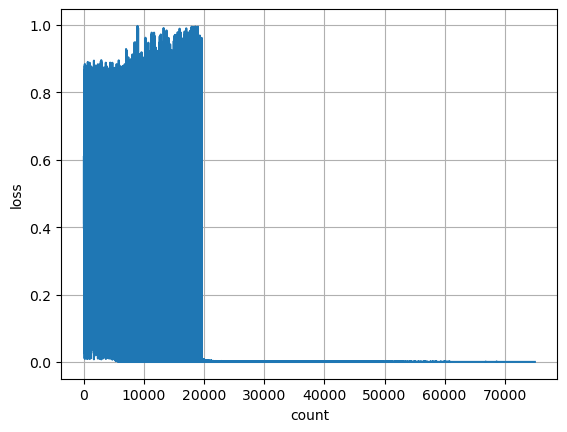

In [7]:

import pprint
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = softmax (z3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2]
    Y_ALL = [fz3]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([[int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)]])
    return in_x, teach

in_x, teach = make_input()
# pprint.pprint(in_x)
# pprint.pprint(teach)

# in_x = np.random.random([1,5])*1
# teach = np.array([[0.5,0.7]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 7
W2 = 9
W3 = 8

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)

from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
    return circle


# # ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ „Åì„Çå„ÅØÂá∫ÂäõÂ±§„ÅÆÂæÆÂàÜ„ÇíË°å„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Åß„ÅÇ„Çã
# def first_grad_fz_and_z(layer_num, Y, Z):
#     triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
#     for gyou in range(len(Z[layer_num][0])):
#         triangle[gyou, gyou] = (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
#     return triangle

#„Ç∑„Ç∞„É¢„Ç§„Éâ„Åò„ÇÉ„Å™„Åè„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„Å´„Åó„Å¶„Åø„Çã„Å®
def first_grad_fz_and_z(layer_num, Y, Z):
    # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    # pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        for retsu in range(len(Z[layer_num][0])):
            if gyou == retsu:
                # print("match")
                triangle[gyou, retsu] = (1-(Y[0][0][gyou])) * (Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã sigmoid„Å®ÈÅï„Å£„Å¶Ôºå„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„ÅÆÊôÇ„ÅØYÔºøALL„ÅÆÂÄ§„Çí„Åù„ÅÆ„Åæ„Åæ‰Ωø„Åà„Å∞ËâØ„ÅÑÔºéË®àÁÆóÁµêÊûú„ÅØ„Åô„Åß„Å´Âá∫„Å¶„ÅÑ„Çã„Åã„Çâ„Çè„Åñ„Çè„Åñ„ÇÇ„ÅÜ‰∏ÄÂ∫¶„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„ÇπÈñ¢Êï∞„Å´ÂÖ•„Çå„ÇãÂøÖË¶Å„Åå„Å™„ÅÑ
                # print(1-(Y[0][0][gyou]))
                # print(Y[0][0][gyou])
                # print((1-(Y[0][0][gyou]))*(Y[0][0][gyou]))
            elif gyou != retsu:
                # print("not_match")
                triangle[gyou, retsu] = -(Y[0][0][gyou]) * (Y[0][0][retsu])    # (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
                # print(Y[0][0][gyou])
                # print(Y[0][0][retsu])

            else:
                print("raise do not yoki error")
                
            # triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    # pprint.pprint(triangle)
    return triangle

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-(FZ[layer_num+1][0][gyou]))*(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    triangle = np.transpose(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    # print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        # print("square_gyou =", square_gyou )
        # print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        # pprint.pprint(square)
        # print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        # print(layer_num-square_gyou)
        # print("FZ_ALL„ÅØ")
        # pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        # print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        # pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        # print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        # pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        # print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    # print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    # pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 1.4
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 75000

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in trange (learn): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    in_x, teach = make_input()
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    loss = sum_squared_error(Y_ALL, teach)
    # loss = Y_ALL - teach
    # loss = np.sum(loss)
    LOSS.append(loss)
    COUNT.append(LEARN)

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        
        if loop_count != 0:
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                koubai = np.dot(koubai, star)
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó

        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã

        loop_count += 1
        # print("Â≠¶Áøí‰∏ÄÂë®ÂàÜÁµÇ„Çè„ÇäÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†")
    loop_count = 0
    
#Â≠¶ÁøíÂæå
print(W_ALL)
# pprint.pprint(W_ALL)
plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()




In [6]:
#Ë™§Â∑ÆÈÄÜ‰ºùÊí≠„ÅÆÊé®Ë´ñ
in_x, teach = make_input()
print(in_x)
print(teach)
Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
# Y_ALL = np.array(Y_ALL)
print(Y_ALL*100)
loss = sum_squared_error(Y_ALL, teach)
print("Ë®àÁÆó„Åó„Åü„Çâ")
print(Y_ALL - teach)
# Â§öÈáç„Å´„Å™„Å£„Å¶„ÅÑ„ÇãÈÖçÂàó„ÅÆÔºåÂΩ¢„ÅåÁï∞„Å™„Çã„Åì„Å®„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑÂéüÂõ†„Åã„Å®ËÄÉ„Åà„Åü„ÅåÔºåË®àÁÆó„Åï„Åõ„Å¶„Åø„Çã„Å®Ë®àÁÆó„Åß„Åç„Å¶„ÅÑ„Çã„Çà„ÅÜ„Å™„ÅÆ„Åß„Çà„Åè„Çè„Åã„Çâ„Å™„ÅÑ
# print(Y_ALL[0])
# k = Y_ALL - teach
# k = 0.5*k*k
# print(k)
# print(np.sum(k))
print(loss)

[[1 1 1]]
[[0 0 0 0 0 0 0 1]]
[[[2.35525408e-03 9.55502311e-10 8.22655521e-11 8.03548367e-10
   4.48073132e-03 1.20095459e+00 2.63436065e-05 9.87921831e+01]]]
Ë®àÁÆó„Åó„Åü„Çâ
[[[2.35525408e-03 9.55502311e-10 8.22655521e-11 8.03548367e-10
   4.48073132e-03 1.20095459e+00 2.63436065e-05 9.77921831e+01]]]
4782.376694028304


# ÂõûÂ∏∞ÂïèÈ°å„Å´„Åó„Å¶Ëß£„Åë„Çã„ÅãÂÆüÈ®ìÔºÅÔºÅÔºàÂá∫ÂäõÂ±§„ÅÆÊ¥ªÊÄßÂåñÈñ¢Êï∞„ÇíÈ´òÁ≠âÈñ¢Êï∞„Å´„ÅóÔºå„Éã„É•„Éº„É≠„É≥„Çí‰∏Ä„Å§„Å´„Åô„ÇãÔºâ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:01<00:00, 4844.03it/s]


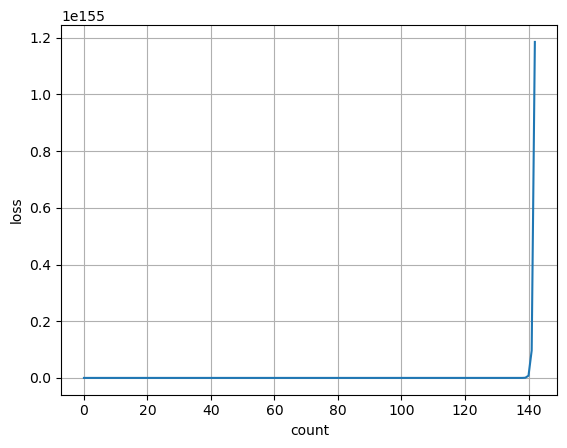

In [24]:

import pprint
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
# np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = identity_function (z3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2]
    Y_ALL = [fz3]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = np.array([[x2*4 + x1*2 + x0]])
    in_x  = np.array([[x2,x1,x0]])
    # teach = np.array([[int(teach==0),
    #                   int(teach==1),
    #                   int(teach==2),
    #                   int(teach==3),
    #                   int(teach==4),
    #                   int(teach==5),
    #                   int(teach==6),
    #                   int(teach==7)]])
    return in_x, teach

in_x, teach = make_input()
# pprint.pprint(in_x)
# pprint.pprint(teach)

# in_x = np.random.random([1,5])*1
# teach = np.array([[0.5,0.7]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 7
W2 = 9
W3 = 1

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)


# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
    return circle


# # ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ „Åì„Çå„ÅØÂá∫ÂäõÂ±§„ÅÆÂæÆÂàÜ„ÇíË°å„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Åß„ÅÇ„Çã
# def first_grad_fz_and_z(layer_num, Y, Z):
#     triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
#     for gyou in range(len(Z[layer_num][0])):
#         triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
#     return triangle

# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ „Åì„Çå„ÅØÂá∫ÂäõÂ±§„ÅÆÂæÆÂàÜ„ÇíË°å„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Åß„ÅÇ„Çã
def first_grad_fz_and_z(layer_num, Y, Z):
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = 1 #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    return triangle

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    triangle = np.transpose(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.5
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 5000

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in trange (learn): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    in_x, teach = make_input()
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    loss = sum_squared_error(Y_ALL, teach)
    # loss = Y_ALL - teach
    # loss = np.sum(loss)
    LOSS.append(loss)
    COUNT.append(LEARN)

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        
        if loop_count != 0:
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                koubai = np.dot(koubai, star)
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó

        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
# pprint.pprint(W_ALL)
plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()




In [26]:
#„Åü„Å†„ÅÆÊé®Ë´ñ
in_x, teach = make_input()
Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
print("------endnetwork-------")
# pprint.pprint(Network)
print("ÂÖ•ÂäõÔºù" , in_x)
print("ÊïôÂ∏´Ôºù" , teach)
# A = change_one_hot(A)

print("ÁµêÊûúÔºàÂõûÂ∏∞ÔºâÔºù" , Y_ALL)

a = Y_ALL - teach 
print("ÊïôÂ∏´„Å®„ÅÆË™§Â∑ÆÔºù" , Y_ALL)
lossa = sum_squared_error(Y_ALL, teach)
print("ÊïôÂ∏´„Å®„ÅÆË™§Â∑ÆÔºù" , lossa)

------endnetwork-------
ÂÖ•ÂäõÔºù [[1 1 1]]
ÊïôÂ∏´Ôºù [[7]]
ÁµêÊûúÔºàÂõûÂ∏∞ÔºâÔºù [array([[nan]])]
ÊïôÂ∏´„Å®„ÅÆË™§Â∑ÆÔºù [array([[nan]])]
ÊïôÂ∏´„Å®„ÅÆË™§Â∑ÆÔºù nan


# Â±§Êï∞Â¢ó„ÇÑ„Åó„Å¶„Åø„Çã „Å°„ÇÉ„Çì„Å®Âãï„Åç„Åæ„Åó„ÅüÔºÅ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:01<00:00, 2691.53it/s]


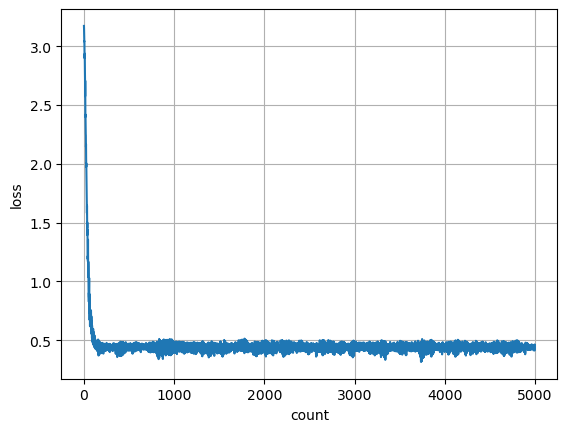

In [1]:

import pprint
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
# np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3,w4):
    network = [w1,b1,w2,b2,w3,b3,w4] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3, W4 = np.array(network[0]), np.array(network[2]), np.array(network[4]), np.array(network[6])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    z4 = np.dot(fz3, W4) #+ b3
    fz4 = sigmoid (z4)
    Z_ALL = [z1, z2, z3, z4]
    FZ_ALL = [in_x, fz1, fz2, fz3]
    Y_ALL = [fz4]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([[int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)]])
    return in_x, teach

in_x, teach = make_input()
# pprint.pprint(in_x)
# pprint.pprint(teach)

# in_x = np.random.random([1,5])*1
# teach = np.array([[0.5,0.7]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 4
W2 = 5
W3 = 7
W4 = 8

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])
w4 = np.random.random([W3,W4])

W_ALL = [w1,w2,w3,w4]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],W_ALL[3])

from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ „Åì„Çå„ÅØÂá∫ÂäõÂ±§„ÅÆÂæÆÂàÜ„ÇíË°å„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Åß„ÅÇ„Çã
def first_grad_fz_and_z(layer_num, Y, Z):
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    return triangle

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    triangle = np.transpose(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.1
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 55000

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],W_ALL[3])
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in trange (5000): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    in_x, teach = make_input()
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],W_ALL[3])
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    loss = sum_squared_error(Y_ALL, teach)
    # loss = Y_ALL - teach
    # loss = np.sum(loss)
    LOSS.append(loss)
    COUNT.append(LEARN)

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        
        if loop_count != 0:
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                koubai = np.dot(koubai, star)
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó

        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
# pprint.pprint(W_ALL)
plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()




In [6]:
square_koubailist

array([[-0.00175236, -0.00148326, -0.00182349, -0.00133752],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00175236, -0.00148326, -0.00182349, -0.00133752]])

## Âá∫ÂäõÂ±§„Çí„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„ÇπÈñ¢Êï∞„Å´„Åô„Çã

### ÂÆüÈ®ìÔºë

In [2]:

import pprint
import numpy as np
from tqdm import trange
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = softmax (z3) #softmaxÈñ¢Êï∞„ÇíÈÄö„Åô„Å®ÔºåÂá∫Âäõ„Åå„Éë„Éº„Çª„É≥„ÉÜ„Éº„Ç∏„ÅßÂá∫„Å¶„Åè„Çã
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2]
    Y_ALL = [fz3]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a) #a„ÅÆ‰∏≠„ÅÆÊúÄÂ§ßÂÄ§„Çíc„Å®„Åä„Åè
    exp_a = np.exp(a - c)#ÂêÑË¶ÅÁ¥†„ÇíÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y

in_x = np.random.random([1,5])*1
teach = np.array([[0.5,0.7,0.8]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 5
W1 = 4
W2 = 3
W3 = 3

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]










# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ


# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ
# def first_grad_fz_and_z(layer_num, Y, Z):
#     print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
#     triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
#     pprint.pprint(triangle)
#     for gyou in range(len(Z[layer_num][0])):
#         triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
#     # print("fin‚ñ≤", triangle)
#     print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
#     pprint.pprint(triangle)
#     return triangle

#„Ç∑„Ç∞„É¢„Ç§„Éâ„Åò„ÇÉ„Å™„Åè„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„Å´„Åó„Å¶„Åø„Çã„Å®
def first_grad_fz_and_z(layer_num, Y, Z):
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        for retsu in range(len(Z[layer_num][0])):
            if gyou == retsu:
                print("match")
                triangle[gyou, retsu] = (1-(Y[0][0][gyou])) * (Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã sigmoid„Å®ÈÅï„Å£„Å¶Ôºå„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„ÅÆÊôÇ„ÅØYÔºøALL„ÅÆÂÄ§„Çí„Åù„ÅÆ„Åæ„Åæ‰Ωø„Åà„Å∞ËâØ„ÅÑÔºéË®àÁÆóÁµêÊûú„ÅØ„Åô„Åß„Å´Âá∫„Å¶„ÅÑ„Çã„Åã„Çâ„Çè„Åñ„Çè„Åñ„ÇÇ„ÅÜ‰∏ÄÂ∫¶„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„ÇπÈñ¢Êï∞„Å´ÂÖ•„Çå„ÇãÂøÖË¶Å„Åå„Å™„ÅÑ
                print(1-(Y[0][0][gyou]))
                print(Y[0][0][gyou])
                print((1-(Y[0][0][gyou]))*(Y[0][0][gyou]))
            elif gyou != retsu:
                print("not_match")
                triangle[gyou, retsu] = -(Y[0][0][gyou]) * (Y[0][0][retsu])    # (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
                print(Y[0][0][gyou])
                print(Y[0][0][retsu])

            else:
                print("raise do not yoki error")
                
            # triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle


# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºéËª¢ÁΩÆ„Åó„Åæ„Åô‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.transpose(triangle)
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        print("square_gyou =", square_gyou )
        print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        pprint.pprint(square)
        print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        print(layer_num-square_gyou)
        print("FZ_ALL„ÅØ")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.6
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
startriangle_count =0 #‰Ωø„Çè„Å™„ÅÑ
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (5): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    print("Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí", LEARN+1, "ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†")
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        # print("FZ_ALLÊ∂à„Åõ„Åü„Åã„Å™")
        # del FZ_ALL[-1]

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("„Åì„Çå„Åã„Çâfor„ÇíÂõû„Åô„Åû")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("‚òÖ‚ñ≤Áπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„Å§„Åæ„Çälayer_num_loop2„ÅØ ",layer_num-1, "„Åã„ÇâÂßã„Åæ„Å£„Å¶„Å≤„Å®„Å§„Å•„Å§Ê∏õ„Çä„Å™„Åå„Çâ", (layer_num-1)-(layer_num-1-loop_count), "ÂõûÁπ∞„ÇäËøî„Åó„Åæ„ÅôÔºé")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                print("starÁµêÊûú‚Üì")
                pprint.pprint(star)
                print("„Åì„Çå„Å®‚Üì„ÅÆÂãæÈÖç")
                pprint.pprint(koubai)
                print("„Çí„Åã„Åë„Çã„Å®")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("„Å®„Å™„Çã")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó
                startriangle_count += 1
                # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
                # pprint.pprint(triangle)
                # print("„ÅßÔºå‚òÖ„ÅØ")
                # pprint.pprint(star)
                # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
                # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ°„Çí‰∏ÄÂõû„ÇÑ„Çä„Åæ„Åô")
        # print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop1, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé‰ª£ÂÖ•Ââç„Å´Ëª¢ÁΩÆ„Åô„Çã„Å®")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        pprint.pprint(square_koubailist)
        print("„Å®„Å™„ÇäÔºåW„Å®ÂΩ¢„Åå‰∏ÄËá¥„Åô„Çã„ÅÆ„ÅßÔºåÂ≠¶ÁøíÁéá„Çí„Åã„Åë„Å¶Âºï„Åè„Åì„Å®„ÅßW„ÅÆÂÄ§„ÇíÊõ¥Êñ∞„Åô„Çã")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





2
W_ALL=
[array([[0.15599452, 0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985, 0.83244264],
       [0.21233911, 0.18182497, 0.18340451, 0.30424224],
       [0.52475643, 0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184, 0.45606998]]),
 array([[0.04645041, 0.60754485, 0.17052412],
       [0.06505159, 0.94888554, 0.96563203],
       [0.80839735, 0.30461377, 0.09767211],
       [0.68423303, 0.44015249, 0.12203823]]),
 array([[0.25877998, 0.66252228, 0.31171108],
       [0.52006802, 0.54671028, 0.18485446],
       [0.96958463, 0.77513282, 0.93949894]])]
B_ALL=
[array([[0.78517596, 0.19967378, 0.51423444, 0.59241457]]),
 array([[0.49517691, 0.03438852, 0.9093204 ]]),
 array([[0.89482735, 0.59789998, 0.92187424]])]
Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí 1 ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†
[[0.33398167 0.40906431 0.25695402]]
ÔºÉÔºÉÔºÉÔºÉÔºÉÔ

In [154]:
# „Å©„Å°„Çâ„ÇÇay0/az0„ÇíË°®„Åô„ÅÆ„ÅßÔºåÁµêÊûú„Åå‰∏ÄËá¥„Åó„Å¶„ÅÑ„Å™„ÅÑ„Å®„Åä„Åã„Åó„ÅÑ
import math
o1 = math.exp(Z_ALL[2][0][0]) * (math.exp(Z_ALL[2][0][1]) + math.exp(Z_ALL[2][0][2])) / (math.exp(Z_ALL[2][0][0]) + math.exp(Z_ALL[2][0][1]) + math.exp(Z_ALL[2][0][2]))**2

o2 = Y_ALL[0][0][0] - (Y_ALL[0][0][0])**2
o3 = (1-(Y_ALL[0][0][0]))*(Y_ALL[0][0][0])
# ‰∏ÄËá¥„Åó„Åæ„Åó„ÅüÔºÅÔºÅ

# „Åª„Åã„ÅÆÂ†¥ÊâÄ„ÇÇ‰∏ÄËá¥„Åô„ÇãÁ®ºÂÉçÁ¢∫Ë™ç
o4 = -math.exp(Z_ALL[2][0][0]) * math.exp(Z_ALL[2][0][1]) / (math.exp(Z_ALL[2][0][0]) + math.exp(Z_ALL[2][0][1]) + math.exp(Z_ALL[2][0][2]))**2


print(o1)
print(o2)
print(o3)
print(o4)

# Ê≠£„Åó„ÅÑ„Åì„Å®„ÅåÁ¢∫Ë™ç„Åß„Åç„Åæ„Åó„ÅüÔºÅÔºÅÔºÅ

0.24244552448847803
0.012782798320261794
0.012782798320261794
-0.12678020966471285


In [35]:
print(Z_ALL)

[array([[1.22162482, 0.47735469, 1.61232168, 1.67632635]]), array([[1.33128826, 1.66484974, 0.91914367]]), array([[1.14755124, 1.48739802, 1.31177264]])]


### ÂÆüÈ®ìÔºí

  0%|          | 0/7000 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7000/7000 [00:06<00:00, 1098.91it/s]


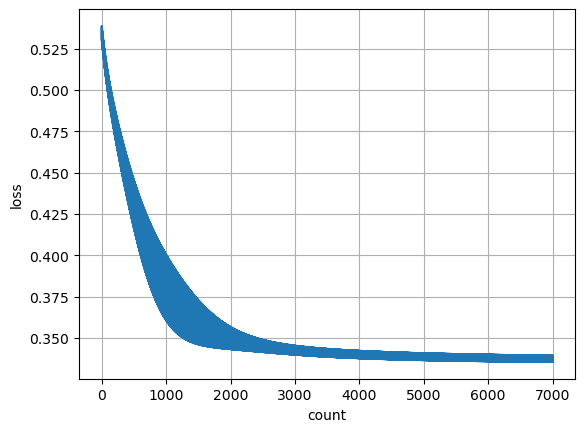

In [28]:

import pprint
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
# np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3,w4):
    network = [w1,b1,w2,b2,w3,b3,w4] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3, W4 = np.array(network[0]), np.array(network[2]), np.array(network[4]), np.array(network[6])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    z4 = np.dot(fz3, W4) #+ b3
    fz4 = softmax (z4)
    Z_ALL = [z1, z2, z3, z4]
    FZ_ALL = [in_x, fz1, fz2, fz3]
    Y_ALL = [fz4]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def softmax(a):
    c = np.max(a) #a„ÅÆ‰∏≠„ÅÆÊúÄÂ§ßÂÄ§„Çíc„Å®„Åä„Åè
    exp_a = np.exp(a - c)#ÂêÑË¶ÅÁ¥†„ÇíÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y

def make_input1():
    # x0 = int(np.random.random()<0.5)
    # x1 = int(np.random.random()<0.5)
    # x2 = int(np.random.random()<0.5)
    # teach = x2*4 + x1*2 + x0
    # in_x  = np.array([[x2,x1,x0]])
    # teach = np.array([[int(teach==0),
    #                   int(teach==1),
    #                   int(teach==2),
    #                   int(teach==3),
    #                   int(teach==4),
    #                   int(teach==5),
    #                   int(teach==6),
    #                   int(teach==7)]])

    #‰∏Ä„Å§„Å´Âõ∫ÂÆö„Åô„Çã„Å®
    x0 = 1
    x1 = 0
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([[int(teach==0),
                        int(teach==1),
                        int(teach==2),
                        int(teach==3),
                        int(teach==4),
                        int(teach==5),
                        int(teach==6),
                        int(teach==7)]])
    return in_x, teach

def make_input2():
    # x0 = int(np.random.random()<0.5)
    # x1 = int(np.random.random()<0.5)
    # x2 = int(np.random.random()<0.5)
    # teach = x2*4 + x1*2 + x0
    # in_x  = np.array([[x2,x1,x0]])
    # teach = np.array([[int(teach==0),
    #                   int(teach==1),
    #                   int(teach==2),
    #                   int(teach==3),
    #                   int(teach==4),
    #                   int(teach==5),
    #                   int(teach==6),
    #                   int(teach==7)]])

    #‰∏Ä„Å§„Å´Âõ∫ÂÆö„Åô„Çã„Å®
    x0 = 1
    x1 = 1
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([[int(teach==0),
                        int(teach==1),
                        int(teach==2),
                        int(teach==3),
                        int(teach==4),
                        int(teach==5),
                        int(teach==6),
                        int(teach==7)]])
    return in_x, teach

def make_input_other():
    # x0 = int(np.random.random()<0.5)
    # x1 = int(np.random.random()<0.5)
    # x2 = int(np.random.random()<0.5)
    # teach = x2*4 + x1*2 + x0
    # in_x  = np.array([[x2,x1,x0]])
    # teach = np.array([[int(teach==0),
    #                   int(teach==1),
    #                   int(teach==2),
    #                   int(teach==3),
    #                   int(teach==4),
    #                   int(teach==5),
    #                   int(teach==6),
    #                   int(teach==7)]])

    #‰∏Ä„Å§„Å´Âõ∫ÂÆö„Åô„Çã„Å®
    x0 = 0
    x1 = 1
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([[int(teach==0),
                        int(teach==1),
                        int(teach==2),
                        int(teach==3),
                        int(teach==4),
                        int(teach==5),
                        int(teach==6),
                        int(teach==7)]])
    return in_x, teach

in_x, teach = make_input()
# pprint.pprint(in_x)
# pprint.pprint(teach)

# in_x = np.random.random([1,5])*1
# teach = np.array([[0.5,0.7]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 4
W2 = 5
W3 = 6
W4 = 8

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])
w4 = np.random.random([W3,W4])

W_ALL = [w1,w2,w3,w4]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],W_ALL[3])

from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
    return circle


# # ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ „Åì„Çå„ÅØÂá∫ÂäõÂ±§„ÅÆÂæÆÂàÜ„ÇíË°å„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Åß„ÅÇ„Çã
# def first_grad_fz_and_z(layer_num, Y, Z):
#     triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
#     for gyou in range(len(Z[layer_num][0])):
#         triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
#     return triangle

#„Ç∑„Ç∞„É¢„Ç§„Éâ„Åò„ÇÉ„Å™„Åè„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„Å´„Åó„Å¶„Åø„Çã„Å®
def first_grad_fz_and_z(layer_num, Y, Z):
    # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    # pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        for retsu in range(len(Z[layer_num][0])):
            if gyou == retsu:
                # print("match")
                triangle[gyou, retsu] = (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã sigmoid„Å®ÈÅï„Å£„Å¶Ôºå„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„ÅÆÊôÇ„ÅØYÔºøALL„ÅÆÂÄ§„Çí„Åù„ÅÆ„Åæ„Åæ‰Ωø„Åà„Å∞ËâØ„ÅÑÔºéË®àÁÆóÁµêÊûú„ÅØ„Åô„Åß„Å´Âá∫„Å¶„ÅÑ„Çã„Åã„Çâ„Çè„Åñ„Çè„Åñ„ÇÇ„ÅÜ‰∏ÄÂ∫¶„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„ÇπÈñ¢Êï∞„Å´ÂÖ•„Çå„ÇãÂøÖË¶Å„Åå„Å™„ÅÑ
                # print(1-(Y[0][0][gyou]))
                # print(Y[0][0][gyou])
            elif gyou != retsu:
                # print("not_match")
                triangle[gyou, retsu] = -(Y[0][0][gyou]) * (Y[0][0][retsu])    # (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
                # print(Y[0][0][gyou])
                # print(Y[0][0][retsu])

            else:
                print("raise do not yoki error")
                
            # triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    # pprint.pprint(triangle)
    return triangle

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-sigmoid(FZ[layer_num+1][0][gyou]))*sigmoid(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    triangle = np.transpose(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.01
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 2500

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],W_ALL[3])
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in trange (7000): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    if LEARN % 3 == 1:
        in_x, teach = make_input1()
    elif LEARN % 3 == 2:
        in_x, teach = make_input2()
    else:
        in_x, teach = make_input_other()

    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],W_ALL[3])
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    loss = sum_squared_error(Y_ALL, teach)
    # loss = Y_ALL - teach
    # loss = np.sum(loss)
    LOSS.append(loss)
    COUNT.append(LEARN)

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        
        if loop_count != 0:
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                koubai = np.dot(koubai, star)
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó

        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
# pprint.pprint(W_ALL)
plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()




In [42]:
#Ë™§Â∑ÆÈÄÜ‰ºùÊí≠„ÅÆÊé®Ë´ñ
in_x, teach = make_input()
print(in_x)
print(teach)
Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
# Y_ALL = np.array(Y_ALL)
print(Y_ALL)
loss = sum_squared_error(Y_ALL, teach)
print("Ë®àÁÆó„Åó„Åü„Çâ")
print(Y_ALL - teach)
# Â§öÈáç„Å´„Å™„Å£„Å¶„ÅÑ„ÇãÈÖçÂàó„ÅÆÔºåÂΩ¢„ÅåÁï∞„Å™„Çã„Åì„Å®„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑÂéüÂõ†„Åã„Å®ËÄÉ„Åà„Åü„ÅåÔºåË®àÁÆó„Åï„Åõ„Å¶„Åø„Çã„Å®Ë®àÁÆó„Åß„Åç„Å¶„ÅÑ„Çã„Çà„ÅÜ„Å™„ÅÆ„Åß„Çà„Åè„Çè„Åã„Çâ„Å™„ÅÑ
# print(Y_ALL[0])
# k = Y_ALL - teach
# k = 0.5*k*k
# print(k)
# print(np.sum(k))
print(loss)

[[0 1 1]]
[[0 0 0 1 0 0 0 0]]
[array([[0.0195284 , 0.29892225, 0.01786916, 0.30384246, 0.01895706,
        0.01766679, 0.30560916, 0.01760472]])]
Ë®àÁÆó„Åó„Åü„Çâ
[[[ 0.0195284   0.29892225  0.01786916 -0.69615754  0.01895706
    0.01766679  0.30560916  0.01760472]]]
0.3345344383636174


### „Éá„Éê„ÉÉ„Ç∞Ôºë„ÄÄÊï∞ÂÄ§ÂæÆÂàÜ„Å®Ë™§Â∑ÆÈÄÜ‰ºùÊí≠„ÅßÈáç„ÅøÊõ¥Êñ∞Âæå„ÇíÊØîËºÉ„Åó„Å¶„Åø„Çã

C:\Users\atusi\AppData\Local\Temp\ipykernel_56840\3203564715.py:125: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´


in_x=
[[0.15416284 0.7400497  0.26331502]]
[[0.53373939 0.01457496 0.91874701]
 [0.90071485 0.03342143 0.95694934]
 [0.13720932 0.28382835 0.60608318]]
ÊúÄÂàù„ÅÆÈ†Ü‰ºùÊí≠„ÅÆÂá∫Âäõ
[[0.77791262 0.70647456]]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 159.27it/s]

kousin
array([array([[1.77939941e-04, 2.02351877e-04, 2.57549009e-05],
              [8.54180581e-04, 9.71375636e-04, 1.23633200e-04],
              [3.03926411e-04, 3.45623232e-04, 4.39900738e-05]]),
       array([[0., 0., 0.]]), array([[0., 0., 0.],
                                     [0., 0., 0.],
                                     [0., 0., 0.]]),
       array([[0., 0., 0.]]), array([[0., 0.],
                                     [0., 0.],
                                     [0., 0.]]), array([[0., 0.]])],
      dtype=object)
kousin
array([array([[1.77939941e-04, 2.02351877e-04, 2.57549009e-05],
              [8.54180581e-04, 9.71375636e-04, 1.23633200e-04],
              [3.03926411e-04, 3.45623232e-04, 4.39900738e-05]]),
       array([[0., 0., 0.]]), array([[0., 0., 0.],
                                     [0., 0., 0.],
                                     [0., 0., 0.]]),
       array([[0., 0., 0.]]), array([[0., 0.],
                                     [0., 0.],
           

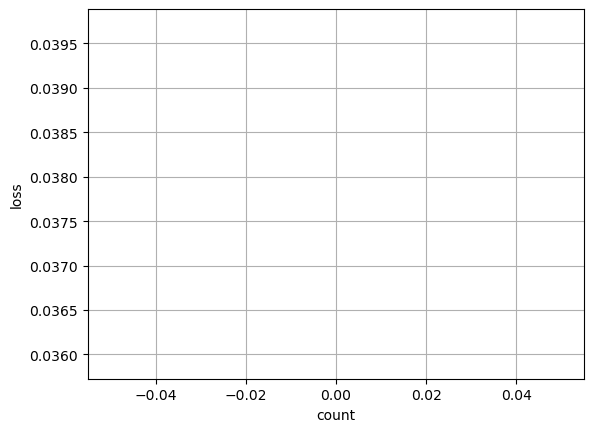

In [9]:
# Êï∞ÂÄ§ÂæÆÂàÜ
import numpy as np
import pprint
import matplotlib.pyplot as plt
from tqdm import trange
np.random.seed(12)


#„Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Çí‰Ωú„ÇãÈñ¢Êï∞
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) #+ b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) #+ b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) #+ b3
    # print(a3)
    y = sigmoid (a3)

    return y #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú






def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




# def make_input():
#     x0 = int(np.random.random()<0.5)
#     x1 = int(np.random.random()<0.5)
#     x2 = int(np.random.random()<0.5)
#     teach = x2*4 + x1*2 + x0
#     in_x  = np.array([x2,x1,x0])
#     teach = np.array([int(teach==0),
#                       int(teach==1),
#                       int(teach==2),
#                       int(teach==3),
#                       int(teach==4),
#                       int(teach==5),
#                       int(teach==6),
#                       int(teach==7)])
#     return in_x, teach

in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])
print("in_x=")
print(in_x)


W1 = 3
W2 = 3
W3 = 2
# np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®òÂÖ•
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([3,W1])
# w1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(3, W1))
print(w1)
# print(w11)
#„Éê„Ç§„Ç¢„Çπ„Çí8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô
b1 = np.random.random([1,W1])
# b1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W1))
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
# w2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W1), size=(W1, W2))

#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
# b2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W2))
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
# w3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W2), size=(W2, W3))
b3 = np.random.random([1,W3])
# b3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W3))


#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.5
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 1


Network = set_network(w1,b1,w2,b2,w3,b3)#ÂàùÊúü„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ‰ΩúÊàê
# in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
# out = forward(Network, in_x)#È†Ü‰ºùÊí≠
# error = sum_squared_error(out,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„ÇíÊØîËºÉ„Åó„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zeros„ÅÆ„Åª„ÅÜ„Åå„Çà„Åï„Åù„ÅÜ„Å™„ÅÆ„ÅßÂ§â„Åà„Åü

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #„Å™„Çì„Åß„ÇÇÈÖçÂàó„ÅÆlist„Éä„Éé„Åß„ÄÅË®àÁÆóÁî®„ÅÆÂΩ¢„Åß„Å™„ÅÑ„ÅÆ„Åß„ÄÅnp.array„Å´
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]
KOUBAI=[]

NForward = forward(Network,in_x)
print("ÊúÄÂàù„ÅÆÈ†Ü‰ºùÊí≠„ÅÆÂá∫Âäõ")
print(NForward)

# print("Êï∞ÂÄ§ÂæÆÂàÜÂ≠¶ÁøíÂâç„ÅÆwË°åÂàó")
# pprint.pprint(Network)

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for i in trange(learn):
    # in_x, teach = make_input()#ÂÖ•Âäõ„Éá„Éº„Çø„Å®ÊïôÂ∏´‰ø°Âè∑‰ΩúÊàê
    # print("ÂãæÈÖç„É™„Çπ„Éà„Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„ÅüÊôÇ„ÅÆNetworkÔºù")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
        for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
            for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó

                # Network1 = Network #„Ç≥„Éî„Éº„Çí‰Ωú„Çã
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Çã „Åì„Åì„ÅØ„Åì„ÅÜ„ÅãÔºü‚ÜíÔºà„É™„Çπ„Éàw1„ÅÆ‰∏Ä„Å§„ÅÆË¶ÅÁ¥†„Å†„Åë„Å´+h„Åó„Å¶„Åã„Çâ„ÄÅset_network„Åß‰Ωú„ÇãÔºü„Åù„Çì„Å™„Åç„Åå„Åô„ÇãÔºâ
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss1 = sum_squared_error(out_y1,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #„ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Çã
                out_y2 = forward(Network2,in_x)#„Åù„ÅÆNetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âá∫Âäõ„ÇíÂæó„Çã
                loss2 = sum_squared_error(out_y2,teach) #Âá∫Âäõ„Å®ÊïôÂ∏´„Éá„Éº„Çø„ÇíÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã

                koubai = bibun_numerical_gradient(loss1,loss2) #Ôºí„Å§„ÅÆË™§Â∑Æ„Åã„Çâ„ÄÅÂãæÈÖç„ÇíÊ±Ç„ÇÅ„ÇãÔºàÊêçÂ§±Èñ¢Êï∞„ÅÆÂæÆÂàÜÂÄ§„ÅåÊ±Ç„Åæ„ÇãÔºâ

                koubai_list[param][gyou][retsu] = koubai #ÂãæÈÖçÊÉÖÂ†±„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åô„Çã„ÄÄ„Åì„Çå„ÇíÁπ∞„ÇäËøî„Åô„Å®„ÄÅÂêÑ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÅåÂÆåÊàê„Åô„Çã
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #„Éë„É©„É°„Éº„Çø„ÇíÊõ¥Êñ∞„ÄÄ1Á®ÆÈ°û„ÅÆ„Éë„É©„É°„Éº„Çø„Åî„Å®„Å´Êõ¥Êñ∞„Åó„Å¶„ÅÑ„ÇãÔºé
        print("kousin")
        pprint.pprint(koubai_list)

        
    
    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)
    KOUBAI.append(koubai_list[0][1][0])

# print("Êï∞ÂÄ§ÂæÆÂàÜÔºëÂõûÂ≠¶ÁøíÂæå„ÅÆwË°åÂàó")
# Networktest1 = Network[0], Network[2], Network[4]
# pprint.pprint(Networktest1)
A = forward(Network,in_x)

# print("------end_learning_result_network„Éª„Éª„Éª-------")
# pprint.pprint(Network)
# print("------endnetwork-------")
# print("ÊïôÂ∏´Ôºù" , teach)
# print("ÂÖ•ÂäõÔºù" , in_x)
# # A = change_one_hot(A)
# print("ÁµêÊûúÔºàÁ¢∫ÁéáÔºâ" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Â¢ó„ÇÑ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „ÅÇ„Çã„Å≤„Å®„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„Å†„Åë„Å°„Çá„Å£„Å®Ê∏õ„Çâ„Åó„ÅüNetwork„Çí‰Ωú„Å£„Å¶„ÄÅÈ†Ü‰ºùÊí≠„Åô„Çã
    # „Åù„ÅÆ‰∫å„Å§„ÅÆÂÄ§„ÇíÊïôÂ∏´„Éá„Éº„Çø„Å®ÊØîËºÉ„Åó„ÄÅË™§Â∑Æ„ÇíË®àÁÆó„Åô„Çã
    # „Åù„Çå„Çâ„ÅÆÂ§âÂåñÈáè„Åã„Çâ„ÄÅ„ÅÇ„Çã‰∏Ä„Å§„ÅÆ„Éë„É©„É°„Éº„Çø„ÅÆÂãæÈÖç„ÇíÊ±Ç„ÇÅ„Çã„ÄÇ„Åù„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã

    # „Åì„Çå„Çâ„Çí„Åô„Åπ„Å¶„ÅÆ„Éë„É©„É°„Éº„Çø„Åß‰∏Ä„Å§‰∏Ä„Å§„ÇÑ„Å£„Å¶(forÊñá)„ÄÅÂãæÈÖç„ÅÆ„É™„Çπ„Éà„ÇíÂÆåÊàê„Åï„Åõ„Çã

    # ÂãæÈÖç„ÅÆ„É™„Çπ„Éà„Å´Â≠¶ÁøíÁéá„Çí„Åã„Åë„ÅüËÄÖ„Çí„ÄÅ‰ªä„ÅÆ„Éë„É©„É°„Éº„Çø„Åã„ÇâÂºï„ÅÑ„Å¶Êõ¥Êñ∞„Åô„Çã

    # Êõ¥Êñ∞Âæå„ÅÆ„Éë„É©„É°„Éº„Çø„ÅßÊñ∞„Åü„Å™Network„Çí‰ΩúÊàê„Åô„Çã



# „Éá„Éê„ÉÉ„Ç∞Ôºí Êï∞ÂÄ§„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ

In [35]:

import pprint
import numpy as np
from tqdm import trange
np.random.seed(12)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    print(fz3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2]
    Y_ALL = [fz3]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

in_x = np.random.random([1,3])
teach = np.array([[0.5,0.7]])

print("in_x„ÅØ", in_x,"„Å†ÔºÅÔºÅ")
# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 3
W2 = 3
W3 = 2

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
print(layer_num)
# W_ALL.append(w1)
# W_ALL.append(w2)
# W_ALL.append(w3)
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

print('W_ALL=')
pprint.pprint(W_ALL)
print('B_ALL=')
pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
# z_all, fz_all = forward(Network, in_x)
# print('z_ALL=')
# pprint.pprint(z_all)
# print('fz_ALL=')
# pprint.pprint(fz_all)
                                                                                            # print('----------------')
                                                                                            # print('z1=')
                                                                                            # pprint.pprint(z1)
                                                                                            # print('z1t=')
                                                                                            # z1t = np.transpose(z1)
                                                                                            # pprint.pprint(z1t)
                                                                                            # print('z1shape=')
                                                                                            # print(z1.shape)
                                                                                            # print('z1tshape=')
                                                                                            # print(z1t.shape)
                                                                                            # print('fz1=')
                                                                                            # pprint.pprint(fz1)
                                                                                            # print('z2=')
                                                                                            # pprint.pprint(z2)
                                                                                            # print('fz2=')
                                                                                            # pprint.pprint(fz2)
                                                                                            # print('z3=')
                                                                                            # pprint.pprint(z3)
                                                                                            # print('fz3=')
                                                                                            # pprint.pprint(fz3_y)
                                                                                            # print('teach')
                                                                                            # pprint.pprint(teach)

                                                                                            # grad_list=[]










# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ
# squareÂ§âÊõ¥ÂÆüÈ®ì„ÅÆ„Ç≥„Éî„ÉºÁâàÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ


# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    print("‚óè„ÅÆÂá¶ÁêÜÈñãÂßã‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        print("„Çµ„Éº„ÇØ„É´")
        print("Y:", Y, "Length:", len(Y))
        print("teach:", teach, "Length:", len(teach))
        print("‚óè„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚Üì‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè‚óè")
        pprint.pprint(circle)
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ
def first_grad_fz_and_z(layer_num, Y, Z):
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã  #################„Åì„Åì„Åå„Åä„Åã„Åó„ÅÑÔºÅÔºÅ
        print(1-sigmoid(Y[0][0][gyou]))
        print("„Åã„Åë„Çã")
        print(sigmoid(Y[0][0][gyou]))
        print("„Çí„Åó„Å¶„ÅÑ„Çã")
        print(Y[0][0][gyou])
    # print("fin‚ñ≤", triangle)
    print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    pprint.pprint(triangle)
    return triangle



# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    print("‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-(FZ[layer_num+1][0][gyou]))*(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    print("‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºéËª¢ÁΩÆ„Åó„Åæ„Åô‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.transpose(triangle)
    pprint.pprint(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    print("‚òÖ„ÅÆÂá¶ÁêÜÈñãÂßã‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    print("‚òÖ„ÅÆÂá¶ÁêÜÁµÇ‰∫ÜÔºÜÁµêÊûú‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ")
    pprint.pprint(star)
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        print("square_gyou =", square_gyou )
        print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        pprint.pprint(square)
        print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        print(layer_num-square_gyou)
        print("FZ_ALL„ÅØ")
        pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-2#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.5
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 5

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
startriangle_count =0 #‰Ωø„Çè„Å™„ÅÑ
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in range (3): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    print("Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí", LEARN+1, "ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†")
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    print("Z_ALL")
    print(Z_ALL)

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        print("ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå",layer_num_loop1, "Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ" )
        # koubai = grad_loss_and_y(layer_num, teach, FZ_ALL[layer_num+1]) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        # layer_num_loop2 = layer_num_loop1
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        # print("FZ_ALLÊ∂à„Åõ„Åü„Åã„Å™")
        # del FZ_ALL[-1]

        # layer_num_loop2 = layer_num_loop1
        if loop_count != 0:
            print("„Åì„Çå„Åã„Çâfor„ÇíÂõû„Åô„Åû")
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                
                print("‚òÖ‚ñ≤Áπ∞„ÇäËøî„Åófor„ÇíÈñãÂßã„Åó„Åæ„ÅôÔºéÁπ∞„ÇäËøî„ÅôÊï∞„Å§„Åæ„Çälayer_num_loop2„ÅØ ",layer_num-1, "„Åã„ÇâÂßã„Åæ„Å£„Å¶„Å≤„Å®„Å§„Å•„Å§Ê∏õ„Çä„Å™„Åå„Çâ", (layer_num-1)-(layer_num-1-loop_count), "ÂõûÁπ∞„ÇäËøî„Åó„Åæ„ÅôÔºé")
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                print("starÁµêÊûú‚Üì")
                pprint.pprint(star)
                print("„Åì„Çå„Å®‚Üì„ÅÆÂãæÈÖç")
                pprint.pprint(koubai)
                print("„Çí„Åã„Åë„Çã„Å®")
                koubai = np.dot(koubai, star)
                pprint.pprint(koubai)
                print("„Å®„Å™„Çã")
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó
                startriangle_count += 1
                # print("‰ªä„Åã„ÇâÔºå‚ñ≤„Å®‚òÖ„ÇíÊéõ„Åë„Åæ„ÅôÔºé‚ñ≤„ÅØ")
                # pprint.pprint(triangle)
                # print("„ÅßÔºå‚òÖ„ÅØ")
                # pprint.pprint(star)
                # print("„Åß„ÅôÔºéÊéõ„ÅëÁÆó„Åô„Çã„Å®Ë®àÁÆóÁµêÊûú„ÅØ")
                # pprint.pprint(W_ALL) Ëª¢Âú∞„Åß„Åç„Å¶„Çã„ÅãÁ¢∫Ë™çÁî®
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # pprint.pprint(star)
                # pprint.pprint(koubai)
                # print("6r6666666666666666666")
                # print("fin=", layer_num_loop2)


        print("forÊñá„ÇíÊäú„Åë„Å¶Ôºålayer_num_loop2=", layer_num_loop2,"„Å´„Å™„Çä„Åæ„Åó„ÅüÔºéÁèæÂú®„ÅÆË°åÂàó„ÅØ‚Üì")
        pprint.pprint(koubai)
        print("„Åß„ÅôÔºé„Åï„ÅÑ„Åî„Å´‚ñ°„Çí‰∏ÄÂõû„ÇÑ„Çä„Åæ„Åô")
        # print("Ë®àÁÆóÂâç‚ÜëÔºåË®àÁÆóÂæå‚Üì")
        # pprint.pprint(koubai)
        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        # print("-----------")
        # print(layer_num_loop1)
        # print("-----------")
        # pprint.pprint(W_ALL[layer_num_loop1])
        print("square_koubailist„Å§„Åæ„Çä„Åù„ÅÆÂ±§„ÅÆÂãæÈÖçË°åÂàóÔºàÂÖ®„Å¶Ôºâ")
        pprint.pprint(square_koubailist)

        print("„Åù„Çå„ÇíÔºåÂÖ®‰Ωì„ÅÆW„Åß„ÅÇ„Çã‰ª•‰∏ã„ÅÆ")
        pprint.pprint(W_ALL)
        print("„ÅÆ„ÅÜ„Å°Ôºå‰ªäÂõûË¶ã„Å¶„ÇãÂ±§„Å§„Åæ„Çä", layer_num_loop1, "Áï™ÁõÆ„Åß„ÅÇ„Çã")
        pprint.pprint(W_ALL[layer_num_loop1])
        print("„Å´‰ª£ÂÖ•„Åô„ÇãÔºé‰ª£ÂÖ•Ââç„Å´Ëª¢ÁΩÆ„Åô„Çã„Å®")
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        pprint.pprint(square_koubailist)
        print("„Å®„Å™„ÇäÔºåW„Å®ÂΩ¢„Åå‰∏ÄËá¥„Åô„Çã„ÅÆ„ÅßÔºåÂ≠¶ÁøíÁéá„Çí„Åã„Åë„Å¶Âºï„Åè„Åì„Å®„ÅßW„ÅÆÂÄ§„ÇíÊõ¥Êñ∞„Åô„Çã")
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        print("Èáç„Åø„ÇíÊõ¥Êñ∞„Åó„Åæ„Åó„Åü.ÁµêÊûú‚Üì")
        pprint.pprint(W_ALL)

        loop_count += 1
    loop_count = 0
    
#Â≠¶ÁøíÂæå
pprint.pprint(W_ALL)





in_x„ÅØ [[0.15416284 0.7400497  0.26331502]] „Å†ÔºÅÔºÅ
2
W_ALL=
[array([[0.53373939, 0.01457496, 0.91874701],
       [0.90071485, 0.03342143, 0.95694934],
       [0.13720932, 0.28382835, 0.60608318]]),
 array([[0.52122603, 0.55203763, 0.48537741],
       [0.76813415, 0.16071675, 0.76456045],
       [0.0208098 , 0.13521018, 0.11627302]]),
 array([[0.8161683 , 0.28958678],
       [0.73312598, 0.70262236],
       [0.32756948, 0.33464753]])]
B_ALL=
[array([[0.94422514, 0.85273554, 0.00225923]]),
 array([[0.30989758, 0.67145265, 0.47122978]]),
 array([[0.97805808, 0.62458211]])]
Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Â≠¶Áøí 1 ÂõûÁõÆÈñãÂßã„Åó„Åæ„ÅôÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†
[[0.77791262 0.70647456]]
Z_ALL
[array([[0.78498581, 0.1017167 , 1.00941752]]), array([[0.77678879, 0.56265199, 0.82025755]]), array([[1.2535433, 0.8783229]])]
ÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉÔºÉ„ÅÑ„ÅæÔºå 2 Â±§ÁõÆ„ÇíË¶ã„Å¶„ÅÑ„Åæ„ÅôÔºÉÔºÉÔºÉÔºÉ

In [14]:
print(sigmoid(0.8783229))

print(1 / (1 + np.exp(-0.8783229)))


k=(1-sigmoid(0.8783229))#*sigmoid(0.8783229)
print(k)




# roundw311 = (0.92231105 - 0.5) * (1-0.92231105) * 0.92231105 * 0.7895876
# print(roundw311)

# roundw312 = (0.84375918 - 0.7) * (1-0.84375918) * 0.84375918 * 0.7895876
# print(roundw312)

0.7064745642618296
0.7064745642618296
0.29352543573817036


In [7]:
print(w1)

[[0.5333937  0.01422386 0.91869096]
 [0.89905535 0.03173596 0.95668029]
 [0.13661886 0.28322865 0.60598746]]


In [29]:
koubai_list[0][1][0]

3.377926193897122e-06

array([[0, 1, 1]])
array([[3]])
[[0.15416284 0.7400497  0.26331502]
 [0.53373939 0.01457496 0.91874701]
 [0.90071485 0.03342143 0.95694934]]
„É©„É≥„ÉÄ„É†„Å´ÁîüÊàê„Åó„ÅüW3=
[[0.30989758 0.67145265 0.47122978 0.8161683  0.28958678 0.73312598
  0.70262236 0.32756948]
 [0.33464753 0.97805808 0.62458211 0.95031352 0.76747565 0.82500925
  0.4066403  0.45130841]
 [0.40063163 0.99513816 0.17756418 0.9625969  0.41925027 0.42405245
  0.46314887 0.37372315]]
ÊúÄÂàù„ÅÆÈ†Ü‰ºùÊí≠„ÅÆÂá∫Âäõ
([array([[1.43445425, 0.04799639, 1.87569634]]), array([[1.69547841, 1.11066601, 0.91329884]]), array([[0.79950624, 2.01329172, 0.99472942, 2.09147344, 1.12122878,
        1.54270127, 1.23011016, 0.88299261]])], [array([[0, 1, 1]]), array([[0.80759439, 0.51199679, 0.86711602]]), array([[0.84494327, 0.75225326, 0.71367473]])], [array([[0.68986885, 0.88218558, 0.73002106, 0.89007168, 0.75421657,
        0.82385707, 0.77383785, 0.70744198]])])
ZALL„ÅØ
[array([[1.43445425, 0.04799639, 1.87569634]]), array([[1.69547841,

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:03<00:00, 3001.87it/s]


ÂãæÈÖç„É™„Çπ„Éà
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.43373717e-06, -8.32632136e-06, -4.60059310e-06],
       [-5.43373717e-06, -8.32632136e-06, -4.60059310e-06]])


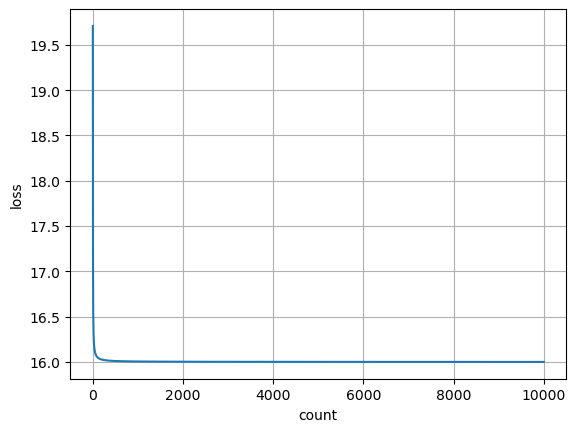

In [9]:
# Ë™§Â∑ÆÈÄÜ‰ºùÊí≠
import pprint
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
# np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö
np.random.seed(12)

def set_network(w1,b1,w2,b2,w3,b3,):
    network = [w1,b1,w2,b2,w3,b3,] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3, = np.array(network[0]), np.array(network[2]), np.array(network[4]),
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = sigmoid (z3)
    Z_ALL = [z1, z2, z3,]
    FZ_ALL = [in_x, fz1, fz2,]
    Y_ALL = [fz3]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def softmax(a):
    c = np.max(a) #a„ÅÆ‰∏≠„ÅÆÊúÄÂ§ßÂÄ§„Çíc„Å®„Åä„Åè
    exp_a = np.exp(a - c)#ÂêÑË¶ÅÁ¥†„ÇíÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([[int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)]])
    return in_x, teach


# in_x, teach = make_input()
# pprint.pprint(in_x)
# pprint.pprint(teach)

# in_x = np.random.random([1,3])*1
# teach = np.array([[0.5,0.7]])

pprint.pprint(in_x)
pprint.pprint(teach)

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 3
W2 = 3
W3 = 8
# W4 = 8

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
print(w1)
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])
# w4 = np.random.random([W3,W4])

W_ALL = [w1,w2,w3,]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)




print("„É©„É≥„ÉÄ„É†„Å´ÁîüÊàê„Åó„ÅüW3=")
print(W_ALL[2])







NForward = forward(Network,in_x)
print("ÊúÄÂàù„ÅÆÈ†Ü‰ºùÊí≠„ÅÆÂá∫Âäõ")
print(NForward)
print("ZALL„ÅØ")
print(NForward[0])

from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
    return circle


# ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ „Åì„Çå„ÅØÂá∫ÂäõÂ±§„ÅÆÂæÆÂàÜ„ÇíË°å„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Åß„ÅÇ„Çã
def first_grad_fz_and_z(layer_num, Y, Z):
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    return triangle

# #„Ç∑„Ç∞„É¢„Ç§„Éâ„Åò„ÇÉ„Å™„Åè„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„Å´„Åó„Å¶„Åø„Çã„Å®
# def first_grad_fz_and_z(layer_num, Y, Z):
#     # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
#     triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
#     # pprint.pprint(triangle)
#     for gyou in range(len(Z[layer_num][0])):
#         for retsu in range(len(Z[layer_num][0])):
#             if gyou == retsu:
#                 # print("match")
#                 triangle[gyou, retsu] = (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã „Å®ÈÅï„Å£„Å¶Ôºå„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„ÅÆÊôÇ„ÅØYÔºøALL„ÅÆÂÄ§„Çí„Åù„ÅÆ„Åæ„Åæ‰Ωø„Åà„Å∞ËâØ„ÅÑÔºéË®àÁÆóÁµêÊûú„ÅØ„Åô„Åß„Å´Âá∫„Å¶„ÅÑ„Çã„Åã„Çâ„Çè„Åñ„Çè„Åñ„ÇÇ„ÅÜ‰∏ÄÂ∫¶„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„ÇπÈñ¢Êï∞„Å´ÂÖ•„Çå„ÇãÂøÖË¶Å„Åå„Å™„ÅÑ
#                 # print(1-(Y[0][0][gyou]))
#                 # print(Y[0][0][gyou])
#             elif gyou != retsu:
#                 # print("not_match")
#                 triangle[gyou, retsu] = -(Y[0][0][gyou]) * (Y[0][0][retsu])    # (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
#                 # print(Y[0][0][gyou])
#                 # print(Y[0][0][retsu])

#             else:
#                 print("raise do not yoki error")
                
#             # triangle[gyou, gyou] = (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
#     # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
#     # pprint.pprint(triangle)
#     return triangle

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-(FZ[layer_num+1][0][gyou]))*(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    triangle = np.transpose(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 0.5
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 10000

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
COUNT=[]
LOSS=[]
KOUBAI=[]

# print("Ë™§Â∑ÆÈÄÜ‰ºùÊí≠ÔºøÂ≠¶ÁøíÂâç„ÅÆW_ALL")
# pprint.pprint(W_ALL)

#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in trange (learn): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    # in_x, teach = make_input()
    # if LEARN % 3 == 1:
    #     in_x, teach = make_input1()
    # elif LEARN % 3 == 2:
    #     in_x, teach = make_input2()
    # else:
    #     in_x, teach = make_input_other()

    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    loss = sum_squared_error(Y_ALL, teach)
    # loss = Y_ALL - teach
    # loss = np.sum(loss)
    LOSS.append(loss)
    COUNT.append(LEARN)

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        
        if loop_count != 0:
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                koubai = np.dot(koubai, star)
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó

        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã
        
        loop_count += 1
    KOUBAI.append(square_koubailist[0][2])
    loop_count = 0
    
print("ÂãæÈÖç„É™„Çπ„Éà")
pprint.pprint(square_koubailist)
#Â≠¶ÁøíÂæå
# print("Ë™§Â∑ÆÈÄÜ‰ºùÊí≠ÔºëÂõûÂ≠¶ÁøíÂæå„ÅÆW_ALL")
# Networktest2 = W_ALL
# pprint.pprint(W_ALL)
# pprint.pprint(W_ALL)
plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()




In [6]:
print(sigmoid(1.32244195))

print(1 / (1 + np.exp(-1.68646861)))



roundw311 = (0.92231105 - 0.5) * (1-0.92231105) * 0.92231105 * 0.7895876
print(roundw311)

roundw312 = (0.84375918 - 0.7) * (1-0.84375918) * 0.84375918 * 0.7895876
print(roundw312)

0.7895876964679743
0.8437591830008367
0.02389293095942457
0.014964042287362337


In [18]:
square_koubailist[0][1]
# pprint.pprint(Networktest2)

-0.0023738063094848687

In [4]:
np.random.seed(12)
w1 = np.random.random([IN,W1])
print(w1)

[[0.15416284 0.7400497  0.26331502 0.53373939]
 [0.01457496 0.91874701 0.90071485 0.03342143]
 [0.95694934 0.13720932 0.28382835 0.60608318]]


In [ ]:
# lay = 3
# for i in range (1, 0, -1): #„Åì„Çå„Åß„ÇÑ„Å£„Å®Ôºê„Å´„Å™„Çã
#     print(i)
#     #‰∫àÊÉ≥„Åß„ÅØÔºìÔºåÔºíÔºåÔºë„Å®„Åß„Çã„ÄÄ„Å§„Åæ„Çälay„ÅØ0„Å´„ÅØ„Å™„Çâ„Å™„ÅÑÔºÅÔºü

# print(i)
pprint.pprint(Z_ALL[layer_num][0]) #‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã„ÄÄ‰∏âËßí„Åß„ÅØÔºå
print(Y_ALL[0][0][0])
print("---------------")
pprint.pprint(Z_ALL)

loss = Y_ALL - teach
print(loss)
# loss = np.sum(loss)
# print(loss)

In [ ]:
def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

in_x1 = np.random.random([1,5])*1
teach1 = np.array([[0.5,0.7]])
pprint.pprint(in_x1)
pprint.pprint(teach1)

inx, teach = make_input()
pprint.pprint(inx)
pprint.pprint(teach)

in_x2 = np.random.random([1,5])*1
pprint.pprint(in_x2)
np.sum(loss)

In [ ]:
# forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅåÔºåÂ§ñÂÅ¥„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÊï∞„Å´Âøú„Åò„Å¶Â¢ó„Åà„Å¶„ÅÑ„Åè„Çà„ÅÜ„Å™„Éó„É≠„Ç∞„É©„É†

In [53]:
print("Z_ALL=")
pprint.pprint(Z_ALL)
print("Z_ALL[0]=")
pprint.pprint(Z_ALL[0])
print("FZ_ALL=")
pprint.pprint(FZ_ALL)
print("W_ALL=")
pprint.pprint(W_ALL)
print(Z_ALL[0][0])
print(FZ_ALL[0][0])

Z_ALL=
[array([[0., 0., 0., 0., 0., 0., 0.]]),
 array([[1.8141954 , 1.89913259, 2.26635247, 1.47493069, 1.82021738,
        1.99443122, 2.38884563, 1.98526594, 1.55690779]]),
 array([[3.40383243]])]
Z_ALL[0]=
array([[0., 0., 0., 0., 0., 0., 0.]])
FZ_ALL=
[array([[0, 0, 0]]),
 array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
 array([[0.85986816, 0.86979332, 0.90605176, 0.81380567, 0.86059221,
        0.88021115, 0.91597276, 0.8792414 , 0.82590919]])]
W_ALL=
[array([[0.43505912, 0.64816957, 1.22896921, 0.57516373, 0.85121843,
        1.18359216, 1.00733745],
       [0.18441243, 0.99399915, 0.49775005, 1.09900239, 0.38198585,
        1.04686955, 0.54552394],
       [0.30357498, 0.86046153, 1.02318056, 0.16280334, 0.64339724,
        0.88889084, 0.12305488]]),
 array([[0.49277335, 0.44202317, 0.28054507, 0.47020383, 0.68983319,
        0.38134403, 0.25326769, 0.56517593, 0.23132786],
       [0.08599246, 0.16363984, 1.00567157, 0.62604393, 0.16702549,
        0.50692823, 0.64491069, 0.33730674

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_fz_and_z(FZ, Z):
    triangle = np.zeros((len(FZ), len(Z)))
    for gyou in range(len(FZ)):
        triangle[gyou, gyou] = (1 - sigmoid(FZ[gyou])) * sigmoid(FZ[gyou])
    return triangle

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å®„Åó„Å¶FZ„Å®Z„Çí‰ªÆÂÆö
FZ = np.array([0.1, 0.5, -0.3])
Z = np.array([0.2, -0.4, 0.6])
pprint.pprint(Z)
pprint.pprint(FZ)

# grad_fz_and_zÈñ¢Êï∞„ÇíÂëº„Å≥Âá∫„Åó„Å¶triangle„ÇíË®àÁÆó
triangle = grad_fz_and_z(FZ, Z)
print(triangle)


In [ ]:
len(W_ALL)
a=np.zeros((2,3))
print(a[0,0])

### „É≠„Éº„Éâ„Éû„ÉÉ„Éó‚óèÔºå‚ñ≤Ôºå‚òÖÔºå‚ñ°, üíó
„Éª„Åæ„ÅöüíóÔºàÂæÆÂàÜÂèØÂê¶Èñ¢Êï∞Ôºâ„Çí‰ΩúÊàê„Åó„Åæ„Åô
„Åù„ÅÆ„ÅÇ„Å®‚óèÔºå‚ñ≤Ôºå‚òÖÔºå‚ñ°„ÅÆÈñ¢Êï∞„Çí‰Ωú„Çä„Åæ„ÅôÔºé„Åù„Çå„Åû„Çå„ÅÆ‰∏≠„Å´üíó„ÅÆÈñ¢Êï∞„ÅåÂÖ•„Çä„Åæ„Åô

In [ ]:



# # üíóÂæÆÂàÜÂèØÂê¶Èñ¢Êï∞‚Üê‚Üê‚Üê‚Üê‚Üê ‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‚Üê‰∏çÂøÖË¶ÅÔºÅÔºÅÔºÅÔºü
# def check_grad_able(round_on, round_under):
#     if 
#     print("‰ªÆ")  #Ê∑ª„ÅàÂ≠ó„Çí„Åø„Å¶ÂæÆÂàÜÂèØËÉΩ„Åã„Å©„ÅÜ„ÅãÂà§Êñ≠Ôºå„Å§„Åæ„ÇäÊ∑ª„ÅàÂ≠ó„Åå‰∏ÄËá¥„Åó„Å¶„ÅÑ„Çã„Å™„Çâtrue„ÇíËøî„ÅóÔºå‰∏ÄËá¥„Åó„Å¶„ÅÑ„Å™„ÅÑ„Å§„Åæ„ÇäÂæÆÂàÜ„Åó„Å¶„ÇÇ0„Å´„Å™„Çã„Å™„Çâfalse„ÇíËøî„ÅôÈñ¢Êï∞
#     return 




# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞„ÄÄ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_loss_and_y(teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        # check_grad_able(Y, teach): #‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„Åß„ÅØ„Åì„Çå„ÅØ„ÅÑ„Çâ„Å™„ÅÑ„Åß„Åô„Å≠„ÄÄÂΩ¢Âºè‰∏äÈÖçÁΩÆ„ÄÄ„Åù„ÇÇ„Åù„ÇÇ„ÅÑ„Çâ„Å™„Åã„Å£„Åü„Åã„ÇÇ
        Y[out] - teach[out]
        circle = []
        circle.append(Y[out] - teach[out])
        circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        return circle
    

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(FZ, Z):
    triangle = np.zeros(len(FZ), len(Z)) #„Å°„ÇÉ„Çì„Å®„Çµ„Ç§„Ç∫„Å´„Å™„Å£„Å¶„ÅÑ„Çã„ÅØ„Åö„ÄÄÂü∫Êú¨ÁöÑ„Å´„Çº„É≠„Åå„Åü„Åè„Åï„Çì„ÅÆË°åÂàó„Åå„Åß„Åç„Çã„ÅÆ„ÅßÔºåÂÆöÁæ©„ÅØ[]„Åß„ÅØ„Å™„Åènp.zeros„Å´„Åó„Åü
    for gyou in range(len(FZ)):
            # for retsu in range(len(Z)): #„Åì„ÅìÂæÆÂ¶ô„ÄÄ‰ΩïÂõûÁπ∞„ÇäËøî„Åõ„Å∞„Çà„ÅÑ„ÅÆ„Åã„ÄÄ„ÅÑ„ÇÑgyouÂõûÁπ∞„ÇäËøî„Åõ„Å∞„ÅÑ„ÅÑ„Å†„Åë„Å†ÔºÅÔºÅ
                # if check_grad_able(FZ[gyou],Z[retsu]) == true  „Åù„ÇÇ„Åù„ÇÇ‰∏âËßíÂ§âÊèõ„ÅØ„ÅÑ„Çâ„Å™„ÅÑÊ∞ó„Åå„Åó„Å¶„Åç„Åü
                    triangle[gyou][gyou] = (1-sigmoid(FZ[gyou]))*sigmoid(FZ[gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
                    # ‰∏âËßíÂ§âÊèõ„ÅØÔºå1Ë°å‰∏ÄÂàóÁõÆÔºå‰∫åË°å‰∫åÂàóÁõÆÔºåÁî£Ê•≠‰∏âÂàóÁõÆÔºåÔºéÔºéÔºé„Å®„ÅÑ„ÅÜ„Çà„ÅÜ„Å™ÂÄ§„Åó„ÅãÂá∫„Å™„ÅÑ„Åã„ÇâOKÔºÅÔºÅÔºÅÔºÅ
                    return triangle



# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÂÅèÂæÆÂàÜÂá¶ÁêÜ„ÇíË°å„Å£„Åü„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
    return star


# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, ):
    square = []
    for square_gyou in range(len(W_ALL[layer_num][0])): #‰ªäË¶ã„Å¶„ÇãÈáç„Åø„ÅÆÂ±§„ÅÆÔºå0Áï™ÁõÆ„ÅÆÈï∑„Åï„Å§„Åæ„ÇäË°åÊï∞„ÇíÂèñÂæó„ÄÄ„Åù„ÅÆÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
        fzt = np.transpose(FZ_ALL[layer_num][square_gyou]) #ÊåáÂÆö„ÅÆÔºà‰ªäË¶ã„Å¶„ÇãÔºâfz„ÅÆnË°åÁõÆ„ÇíËª¢ÂÄ§„Åó„Åü„ÇÇ„ÅÆ„ÇíÂèñ„ÇäÂá∫„Åô
        square.append(fzt)
    return square

    



#
    # for param in range(len(Network)): #„Éë„É©„É°„Éº„Çø„ÅÆÁ®ÆÈ°ûÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô„ÄÄÊú¨Êù•„ÅØlen(Network)ÁöÑ„Å™ÊÑü„Åò„Å´„Å™„Çã„ÄÄ„ÇÑ„ÇäÊñπ„Çè„Åã„Çâ„Å™„Åã„Å£„Åü
    #     for gyou in range(len(Network[param])): #w1ÁöÑ„Å™ÊÑü„Åò„Å§„Åæ„ÇäË°åÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó network0Áï™ÁõÆ„ÅÆ„ÄÅË°åÊï∞„ÇíÂèñÂæóÔºü
    #         for retsu in range(len(Network[param][gyou])): #ÂàóÊï∞„Çµ„Ç§„Ç∫ÂèñÂæó



# 3Â±§ÁõÆ„ÅÆÂãæÈÖçË®àÁÆó„ÄÄ„ÅØ„ÄÅ„Å§„Åæ„Çä„Åì„ÅÜ„Å™„Çä„Åæ„Åô

## ‰∏ä„ÅÆ„ÇíÊï¥ÁêÜ„Åó„Åü„Çâ„Åì„ÅÜ„Å™„Çã

In [ ]:
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        Y[out] - teach[out]
        circle.append(Y[out] - teach[out])
        circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
        return circle
    

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(FZ, Z):
    triangle = np.zeros(len(FZ), len(Z)) 

    for gyou in range(len(FZ)):
        triangle[gyou][gyou] = (1-sigmoid(FZ[gyou]))*sigmoid(FZ[gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
        return triangle
            


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,):
    W = W_ALL[layer_num] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÂÅèÂæÆÂàÜÂá¶ÁêÜ„ÇíË°å„Å£„Åü„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã
    return star


# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, ):
    square = []
    for square_gyou in range(len(W_ALL[layer_num][0])): #‰ªäË¶ã„Å¶„ÇãÈáç„Åø„ÅÆÂ±§„ÅÆÔºå0Áï™ÁõÆ„ÅÆÈï∑„Åï„Å§„Åæ„ÇäË°åÊï∞„ÇíÂèñÂæó„ÄÄ„Åù„ÅÆÊï∞„Å†„ÅëÁπ∞„ÇäËøî„Åô
        fzt = np.transpose(FZ_ALL[layer_num][square_gyou]) #ÊåáÂÆö„ÅÆÔºà‰ªäË¶ã„Å¶„ÇãÔºâfz„ÅÆnË°åÁõÆ„ÇíËª¢ÂÄ§„Åó„Åü„ÇÇ„ÅÆ„ÇíÂèñ„ÇäÂá∫„Åô
        square.append(fzt)
    return square

## „Åì„Çå„ÇíË∏è„Åæ„Åà„Å¶ÔºåÂ≠¶Áøí„Åï„Åõ„Çã

### È†Ü‰ºùÊí≠„ÇíÊõ∏„ÅçÁõ¥„ÅôÔºàÈÄÜ‰ºùÊí≠„Åå‰Ωø„Åà„Çã„Çà„ÅÜ„Å´Ôºåw1,w2,w3„ÇíW„ÅÆ„É™„Çπ„Éà„Å´„Åó„Å¶„Åæ„Å®„ÇÅ„Åü„Çä„Åô„ÇãÔºâ

In [ ]:
# ÂÖ•ÂäõÔºì„Åì„ÄÅÈö†„ÇåÂ±§ÔºëÂ±§ÁõÆÔºìÂÄã„ÄÅÈö†„Çå„Åù„ÅÜÔºíÂ±§ÁõÆÔºìÂÄã„ÄÅÂá∫ÂäõÂ±§ÔºíÂÄã
import pprint
import numpy as np
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö


def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x): #È†Ü‰ºùÊí≠„ÄÄ„Éã„É•„Éº„É≠„É≥„ÅÆÂá∫Âäõ„Å®ÂÖ•Âäõ„Çí„Åù„Çå„Åû„ÇåÔΩöÔºåÔΩÜÔΩö„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åæ„Å®„ÇÅ„Çã
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    z1 = np.dot(in_x, W1) + b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) + b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) + b3
    fz3 = sigmoid (z3)

    Z_ALL = [z1, z2, z3]

    FZ_ALL = [fz1, fz2, fz3]

    return Z_ALL, FZ_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 


in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])

# ÂêÑÂ±§„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíË®≠ÂÆö„Åô„Çã
IN = 3
W1 = 3
W2 = 3
W3 = 2

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆöÔºà„Åì„Åì„Åß„ÅØ„É©„É≥„ÉÄ„É†„Å™ÂÄ§„Çí„Å®„ÇãÔºâ
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]
B_ALL = [b1,b2,b3]


                                                                                            # print('W_ALL=')
                                                                                            # pprint.pprint(W_ALL)
                                                                                            # print('B_ALL=')
                                                                                            # pprint.pprint(B_ALL)
                                                                                            # print('w1=')
                                                                                            # pprint.pprint(w1)
                                                                                            # print('b1=')
                                                                                            # pprint.pprint(b1)
                                                                                            # print('w2=')
                                                                                            # pprint.pprint(w2)
                                                                                            # print('b2=')
                                                                                            # pprint.pprint(b2)
                                                                                            # print('w3=')
                                                                                            # pprint.pprint(w3)
                                                                                            # print('b3=')
                                                                                            # pprint.pprint(b3)

Network = set_network(w1,b1,w2,b2,w3,b3)
# z1, fz1, z2, fz2, z3, fz3, z_all, fz_all = forward(Network, in_x)
print('----------------')
print('z1=')
pprint.pprint(z1)
print('z1t=')
z1t = np.transpose(z1)
pprint.pprint(z1t)
print('z1shape=')
print(z1.shape)
print('z1tshape=')
print(z1t.shape)
print('fz1=')
pprint.pprint(fz1)
print('z2=')
pprint.pprint(z2)
print('fz2=')
pprint.pprint(fz2)
print('z3=')
pprint.pprint(z3)
print('fz3=')
pprint.pprint(fz3)
print('teach')
pprint.pprint(teach)

grad_list=[]


##################################################################################################

In [ ]:
x[] #„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„Å∏„ÅÆÂÖ•ÂäõÂÄ§Ê†ºÁ¥çÈÖçÂàó
w[[[]]] #Èáç„Åø„ÅÆÂÄ§Ê†ºÁ¥çÈÖçÂàó 
z[[]] #„Éã„É•„Éº„É≠„É≥„Å∏„ÅÆÂÖ•ÂäõÂÄ§Ê†ºÁ¥çÈÖçÂàó
fz[[]] #ÂÖ•ÂäõÂÄ§Ê†ºÁ¥çÈÖçÂàó

def grad_sigmoidgrad():
    gradsigmoid

def grad_get_keisuu():
    get_keisuu


In [ ]:
#Âæå„Çç„Åã„Çâ‰∏ÄÂ±§ÁõÆ„ÅÆË®àÁÆó
aloss_aw311 = aloss_ay1 * ay1_az31 * az31_aw311


In [ ]:
#Âæå„Çç„Åã„Çâ‰∏ÄÂ±§ÁõÆ„ÅÆÂãæÈÖç„ÇíË®àÁÆó
grad_list[0] = np.dot(fz3_y - teach, z3)

In [ ]:
aloss_ay1 = (y[0][0] - teach[0][0])
print(aloss_ay1)

aloss_ay2 = (y[0][1] - teach[0][1])
print(aloss_ay2)

In [ ]:
#aloss_aw311„ÇíÊ±Ç„ÇÅ„Çã
ay1_az31 = (1-y[0][0])*(y[0][0])
fz31 = ay1_az31
az31_aw311 = z2[0][0]
#
fz21 = az31_aw311
#
aloss_aw311 = aloss_ay1 * ay1_az31 * az31_aw311 #w311„ÅÆÂãæÈÖç„ÅÆÂÄ§
print(aloss_aw311)

In [ ]:
#aloss_aw312„ÇíÊ±Ç„ÇÅ„Çã
ay2_az32 = (1-y[0][1])*(y[0][1])
aloss_aw312 = aloss_ay2 * ay2_az32 * az32_aw312 #w311„ÅÆÂãæÈÖç„ÅÆÂÄ§
print(aloss_aw312)

In [ ]:
#aloss_aw321„ÇíÊ±Ç„ÇÅ„Çã
ay1_aw321 = out[3][0][1] #f(z22)„ÅÆ„Åì„Å®„ÄÄforward„ÅÆÊàª„ÇäÂÄ§4Áï™ÁõÆ„ÅÆ1Áï™ÁõÆ„ÅÆÈÖçÂàó„ÅÆ2Áï™ÁõÆ„ÅÆÂÄ§„Ååf(z22)„Åß„ÅÇ„Çã„Åü„ÇÅ
print(ay1_aw321)
aloss_aw321 = aloss_ay1 * ay1_aw321
print(aloss_aw321)

In [ ]:
#aloss_aw322„ÇíÊ±Ç„ÇÅ„Çã
ay2_aw322 = out[3][0][1] #f(z22)„ÅÆ„Åì„Å®„ÄÄforward„ÅÆÊàª„ÇäÂÄ§4Áï™ÁõÆ„ÅÆ1Áï™ÁõÆ„ÅÆÈÖçÂàó„ÅÆ2Áï™ÁõÆ„ÅÆÂÄ§„Ååf(z22)„Åß„ÅÇ„Çã„Åü„ÇÅ
print(ay2_aw322)
aloss_aw322 = aloss_ay2 * ay2_aw322
print(aloss_aw322)

In [ ]:
#aloss_aw331„ÇíÊ±Ç„ÇÅ„Çã
ay1_aw331 = out[3][0][2] #f(z23)„ÅÆ„Åì„Å®„ÄÄforward„ÅÆÊàª„ÇäÂÄ§4Áï™ÁõÆ„ÅÆ1Áï™ÁõÆ„ÅÆÈÖçÂàó„ÅÆ2Áï™ÁõÆ„ÅÆÂÄ§„Ååf(z22)„Åß„ÅÇ„Çã„Åü„ÇÅ
print(ay1_aw331)
aloss_aw331 = aloss_ay1 * ay1_aw331
print(aloss_aw331)

In [ ]:
#aloss_aw332„ÇíÊ±Ç„ÇÅ„Çã
ay2_aw332 = out[3][0][2] #f(z23)„ÅÆ„Åì„Å®„ÄÄforward„ÅÆÊàª„ÇäÂÄ§4Áï™ÁõÆ„ÅÆ1Áï™ÁõÆ„ÅÆÈÖçÂàó„ÅÆ2Áï™ÁõÆ„ÅÆÂÄ§„Ååf(z22)„Åß„ÅÇ„Çã„Åü„ÇÅ
print(ay2_aw332)
aloss_aw332 = aloss_ay2 * ay2_aw332
print(aloss_aw332)

In [ ]:
in_x = np.random.random([1,3])*1
print(in_x)

In [ ]:
def loss_derivative(Y, T):
    for retsu_size in range(len(fz3_y[0])):
        loss = Y[0][retsu_size] - T[0][retsu_size]
    return loss
# Âá∫Âäõ„Å®ÊïôÂ∏´„ÅØ„Å®„ÇÇ„Å´„Åü„Å†„ÅÆÂàó„Éô„ÇØ„Éà„É´„Å†

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return (1 - sigmoid(x)) * sigmoid(x)

# Ë≥™Âïè

In [ ]:
list1 = [['python', 'list'], ['length', 'two', ' demension']]
length = 0

for x in list1: ###„Å§„Åæ„Çälist1=5ÔºüÔºü
    length += len(x)  #Âèñ„ÇäÂá∫„Åó„ÅüË¶ÅÁ¥†„ÅÆÈï∑„Åï„ÇíË∂≥„Åó„Å¶„ÅÑ„Åè

print('list1„ÅÆÈï∑„Åï„ÅØ{}„Åß„Åô'.format(length))

In [ ]:
for fi in range(10):
    print("a")
    if fi == 3:
        break


# „É´„Éº„Éó„ÅÆÂ§ñ„Åßi„Çí‰ΩøÁî®„Åô„Çã
print(fi)  # ÊúÄÂæå„ÅÆ„É´„Éº„Éó„ÅÆÂÄ§„ÅåË°®Á§∫„Åï„Çå„Çã

for ai in range(10):
    print("a")
    if ai == 4:
        break

print(fi)


In [ ]:
def maru ():
    round_loss_round_Y = y - t
    return round_loss_round_Y


In [ ]:
# import os
# import requests
# from docx import Document

# # ChatGPT API„Ç®„É≥„Éâ„Éù„Ç§„É≥„Éà„Å®API„Ç≠„Éº
# API_ENDPOINT = "https://api.openai.com/v1/chat/completions"
# # API_KEY = "ninni"

# # Êé°ÁÇπ„Éï„Ç©„É´„ÉÄ„ÅÆ„Éë„Çπ
# folder_path = r"c:\Users\atusi\Desktop\AIfolder"

# # ChatGPT„Å´ÈÄÅ„ÇãÊé°ÁÇπÂü∫Ê∫ñ
# prompt = "Â∞èË´ñÊñá„ÇíÊ∑ªÂâä„Åô„ÇãÂ§ßÂ≠¶„ÅÆÊïôÂì°„Å®„Åó„Å¶Ôºå„Åì„Å°„Çâ„ÅÆÊñáÁ´†„ÇíÊ∑ªÂâä„Åó„Å¶„Åè„Å†„Åï„ÅÑÔºéËâØ„ÅÑ„Å®„Åì„Çç„Å®ÊÇ™„ÅÑ„Å®„Åì„Çç„ÇíË©ï‰æ°„Åó„ÅüÂæåÔºåÁ∑èÂêàË©ï‰æ°„ÇíS,A,B,C,D„ÅÆ5ÊÆµÈöé„ÅßÁ§∫„Åó„Å¶„Åè„Å†„Åï„ÅÑÔºé„Åù„ÅÜÂà§Êñ≠„Åó„ÅüÁêÜÁî±„ÇÇÂ∞ë„Å™„ÇÅ„Åß„Çà„ÅÑ„ÅÆ„ÅßÊõ∏„ÅÑ„Å¶„Åè„Å†„Åï„ÅÑÔºé"

# # ChatGPT API„Å´„É™„ÇØ„Ç®„Çπ„Éà„ÇíÈÄÅ‰ø°„Åô„ÇãÈñ¢Êï∞
# def get_gpt_response(prompt, api_key):
#     headers = {
#         "Content-Type": "application/json",
#         "Authorization": f"Bearer {api_key}",
#     }
#     data = {
#         "messages": [{"role": "system", "content": prompt}],
#         "temperature": 0.7, #0~1„ÅÆÁØÑÂõ≤„ÅßÔºåÂ∞è„Åï„ÅÑ„Åª„Å©Âé≥ÂØÜ„Å´„Å™„ÇãÔºå„ÅØ„ÅöÈÄÜ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì
#         "max_tokens": 2000, #ÊúÄÂ§ß„Éà„Éº„ÇØ„É≥Êï∞„ÄÄÂ∞è„Åï„ÅÑ„Å®ÈÄî‰∏≠„ÅßÁîüÊàê„ÅåÁµÇ„Çè„Å£„Å¶„Åó„Åæ„ÅÜ
#         "model": "gpt-3.5-turbo"
#     }
#     response = requests.post(API_ENDPOINT, headers=headers, json=data)
#     response_data = response.json()

#     print(response_data)  # API„ÅÆ„É¨„Çπ„Éù„É≥„Çπ„ÅÆÂÜÖÂÆπ„ÇíË°®Á§∫

#     # API„É¨„Çπ„Éù„É≥„Çπ„Å´"choices"„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™ç„Åô„Çã
#     if "choices" in response_data and len(response_data["choices"]) > 0:
#         return response_data["choices"][0]["message"]["content"]
#     else:
#         return "ChatGPT„ÅÆ„É¨„Çπ„Éù„É≥„Çπ„Å´„Ç®„É©„Éº„Åå„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇ"

# # „Éï„Ç©„É´„ÉÄÂÜÖ„ÅÆWord„Éï„Ç°„Ç§„É´„ÇíË™≠„ÅøËæº„Çì„ÅßChatGPT„Å´Ê∑ªÂâä„Åó„Å¶„ÇÇ„Çâ„ÅÑ„ÄÅÁµêÊûú„Çí‰øùÂ≠ò„Åô„Çã
# for filename in os.listdir(folder_path):
#     if filename.endswith(".docx"):  # Word„Éï„Ç°„Ç§„É´„Å†„Åë„ÇíÂá¶ÁêÜ
#         file_path = os.path.join(folder_path, filename)

#         # Word„Éï„Ç°„Ç§„É´„ÇíË™≠„ÅøËæº„ÇÄ
#         doc = Document(file_path)
#         full_text = ""

#         # Word„Éï„Ç°„Ç§„É´„ÅÆÊÆµËêΩ„ÇíÁµêÂêà„Åó„Å¶ChatGPT„Å´ÈÄÅ„ÇãÊñáÁ´†„Çí‰ΩúÊàê
#         for para in doc.paragraphs:
#             full_text += para.text + "\n"

#         full_text = prompt + "\n" + full_text
#         gpt_response = get_gpt_response(full_text, API_KEY)

#         # ChatGPT„ÅÆÊ∑ªÂâäÁµêÊûú„ÇíWord„Éï„Ç°„Ç§„É´„Å´ËøΩÂä†„Åó„Å¶‰øùÂ≠ò
#         doc.add_paragraph("\nChatGPT„Å´„Çà„ÇãÊ∑ªÂâäÁµêÊûú:\n")
#         doc.add_paragraph(gpt_response)
#         doc.save(f"{file_path}_Ê∑ªÂâäÁµêÊûú.docx")
#         print(f"{filename}„ÅìÁõÆ„ÅåÁµÇ„Çè„Çä„Åæ„Åó„Åü")

# print("Âá¶ÁêÜ„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„Åü„ÄÇ")


In [ ]:
# ChatGPT API„Å´„É™„ÇØ„Ç®„Çπ„Éà„ÇíÈÄÅ‰ø°„Åô„ÇãÈñ¢Êï∞
def get_gpt_response(prompt, api_key):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}",
    }
    data = {
        "prompt": prompt,
        "temperature": 0.7,
        "max_tokens": 100,
        "model": "gpt-3.5-turbo"  # „Åì„Åì„Åß„É¢„Éá„É´„ÇíÊåáÂÆö„Åó„Åæ„Åô
    }
    response = requests.post(API_ENDPOINT, headers=headers, json=data)
    response_data = response.json()

    # API„É¨„Çπ„Éù„É≥„Çπ„Å´"choices"„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™ç„Åô„Çã
    if "choices" in response_data and len(response_data["choices"]) > 0:
        return response_data["choices"][0]["message"]["content"]
    else:
        return "ChatGPT„ÅÆ„É¨„Çπ„Éù„É≥„Çπ„Å´„Ç®„É©„Éº„Åå„ÅÇ„Çä„Åæ„Åó„Åü„ÄÇ"

# ‰ª•Èôç„ÅÆ„Ç≥„Éº„Éâ„ÅØÂ§âÊõ¥„Å™„Åó


In [ ]:
matrix1 = [ [1, 2], [3, 4] ]
matrix2 = [ [5, 6], [7, 8] ]
matrix3 = [ [9, 10], [11, 12] ]

# Ë°åÂàó„Çí„É™„Çπ„Éà„Å®„Åó„Å¶ÁµêÂêà„Åô„Çã
merged_list = matrix1 + matrix2 + matrix3

print(merged_list)


In [ ]:
matrix1 = [ [1, 2], [3, 4] ]
matrix2 = [ [5, 6], [7, 8] ]
matrix3 = [ [9, 10], [11, 12] ]

# Ë°åÂàó„Çí„É™„Çπ„Éà„Å´ËøΩÂä†„Åô„Çã
merged_list = []
merged_list.extend(matrix1)
merged_list.extend(matrix2)
merged_list.extend(matrix3)

print(merged_list)


In [ ]:
matrix1 = [ [1, 2], [3, 4] ]
matrix2 = [ [5, 6], [7, 8] ]
matrix3 = [ [9, 10], [11, 12] ]

# Êñ∞„Åó„ÅÑ„É™„Çπ„Éà„Çí‰ΩúÊàê„Åó„Å¶Ë°åÂàó„ÇíËøΩÂä†„Åô„Çã
merged_list = [matrix1, matrix2, matrix3]

print(merged_list)


# „Éá„Éê„ÉÉ„Ç∞„Åó„ÅüÁµêÊûúÔºå„Å§„ÅÑ„Å´Êú¨ÂΩì„Å´ÂèéÊùü„Åô„Çã„Çà„ÅÜ„Å´„Å™„Çä„Éó„É≠„Ç∞„É©„É†„ÅåÂÆåÊàê„Åó„Åæ„Åó„ÅüÔºÅÔºÅÔºÅÔºÅ

In [ ]:

import pprint
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„Å´‰π±Êï∞„Ç∑„Éº„Éâ„ÇíË®≠ÂÆö

def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list„ÅØ‰∏≠Ë∫´‰Ωï„Åß„ÇÇ„Çà„ÅóÈÖçÂàó„Å™„ÅÆ„Åß„ÄÅarray„ÅØÊï∞ÂÄ§„ÅÆÈÖçÂàó
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    # b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    z1 = np.dot(in_x, W1) #+ b1
    fz1 = sigmoid(z1) #„Åù„ÅÆÂ±§„ÅÆ„Åô„Åπ„Å¶„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅÆÂÖ•Âäõ„Å´„Ç∑„Ç∞„É¢„Ç§„ÉâÈñ¢Êï∞„Çí„Åã„Åë„Å¶Âá∫Âäõ„Çí‰ΩúÊàê„Åô„Çã„ÄÇ
    z2 = np.dot(fz1, W2) #+ b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) #+ b3
    fz3 = softmax (z3)
    Z_ALL = [z1, z2, z3]
    FZ_ALL = [in_x, fz1, fz2]
    Y_ALL = [fz3]
    return Z_ALL, FZ_ALL, Y_ALL #x„ÇíÂÖ•Âäõ„Åó„Åünetwork„ÅßÈ†Ü‰ºùÊí≠„Åó„Å¶Âæó„Çâ„Çå„ÅüÂá∫ÂäõÁµêÊûú

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#ÊÅíÁ≠âÈñ¢Êï∞
    return x 

def sum_squared_error(y, t):#Ôºí‰πóÂíåË™§Â∑Æ
    return 0.5 * np.sum((y-t)**2)

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#ÊúÄÂ§ßÂÄ§„ÅßÂºï„Åè„Åì„Å®„Åß„ÄÅ„Ç™„Éº„Éê„Éº„Éï„É≠„Éº„ÇíÈò≤„Åê
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([[x2,x1,x0]])
    teach = np.array([[int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)]])
    return in_x, teach

in_x, teach = make_input()
# pprint.pprint(in_x)
# pprint.pprint(teach)

# in_x = np.random.random([1,5])*1
# teach = np.array([[0.5,0.7]])

# „Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„ÇíÊ±∫„ÇÅ„Çã
IN = 3
W1 = 7
W2 = 9
W3 = 8

#ÂàùÊúü„ÅÆÈáç„Åø„Å®„Éê„Ç§„Ç¢„Çπ„ÇíË®≠ÂÆö
#3„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ„ÄÅ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w1 = np.random.random([IN,W1])*1
#„Éê„Ç§„Ç¢„Çπ„ÇíÁî®ÊÑè
b1 = np.random.random([1,W1])
 #8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w2 = np.random.random([W1,W2])*1
#5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´„Åü„Åô„Éê„Ç§„Ç¢„Çπ
b2 = np.random.random([1,W2])
 #5„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Åã„Çâ8„Å§„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÈöõ„ÅÆÈáç„Åø
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])

W_ALL = [w1,w2,w3]# Èáç„Åø„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò
layer_num = len(W_ALL)-1 #Â±§„ÅÆÊï∞Áî®„ÅÆÂ§âÊï∞„ÄÄÔºê„Çπ„Çø„Éº„Éà„Å´„Åô„Çã„Åü„ÇÅÔºëÊ∏õ„Çâ„Åó„Å¶„ÅÑ„Çã
B_ALL = [b1,b2,b3]# „Éê„Ç§„Ç¢„Çπ„Éë„É©„É°„Éº„Çø„Çí‰øùÂ≠ò

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)

from tqdm import trange
# ‚óè„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞
def grad_loss_and_y(layer_num, teach, Y):
    circle = []
    for out in range(len(teach)): #Âá∫Âäõ„ÅÆÊï∞„Å§„Åæ„ÇäÊïôÂ∏´„ÅÆÊï∞„Å†„Åë(y-t)„Åå„Åß„Å¶„Åè„Çã
        loss = Y[0][out] - teach[out] #Y-ÔΩî
        circle.append(loss) #ÁµêÊûú„Çí‰∏Ä„Å§„Åö„Å§Ë∂≥„Åó„Åì„Çì„Åß„ÅÑ„Åè
        # circle = np.transpose(circle) #ÂÅèÂæÆÂàÜË®àÁÆó„Å´„Çà„Å£„Å¶Ëª¢ÁΩÆË°åÂàó„Å´„Å™„Å£„Åü
    return circle


# # ‰∏ÄÁï™ÊúÄÂàù„ÅÆ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)Âá∫Âäõ„ÇíË¶ã„Çã„Åã„ÇâÔºålayer_num+1Áï™ÁõÆ „Åì„Çå„ÅØÂá∫ÂäõÂ±§„ÅÆÂæÆÂàÜ„ÇíË°å„Å£„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„Åß„ÅÇ„Çã
# def first_grad_fz_and_z(layer_num, Y, Z):
#     triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
#     for gyou in range(len(Z[layer_num][0])):
#         triangle[gyou, gyou] = (1-(Y[0][0][gyou]))*(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
#     return triangle

#„Ç∑„Ç∞„É¢„Ç§„Éâ„Åò„ÇÉ„Å™„Åè„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„Å´„Åó„Å¶„Åø„Çã„Å®
def first_grad_fz_and_z(layer_num, Y, Z):
    # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    triangle = np.zeros((len(Y[0][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê
    # pprint.pprint(triangle)
    for gyou in range(len(Z[layer_num][0])):
        for retsu in range(len(Z[layer_num][0])):
            if gyou == retsu:
                # print("match")
                triangle[gyou, retsu] = (1-(Y[0][0][gyou])) * (Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã sigmoid„Å®ÈÅï„Å£„Å¶Ôºå„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„Çπ„ÅÆÊôÇ„ÅØYÔºøALL„ÅÆÂÄ§„Çí„Åù„ÅÆ„Åæ„Åæ‰Ωø„Åà„Å∞ËâØ„ÅÑÔºéË®àÁÆóÁµêÊûú„ÅØ„Åô„Åß„Å´Âá∫„Å¶„ÅÑ„Çã„Åã„Çâ„Çè„Åñ„Çè„Åñ„ÇÇ„ÅÜ‰∏ÄÂ∫¶„ÇΩ„Éï„Éà„Éû„ÉÉ„ÇØ„ÇπÈñ¢Êï∞„Å´ÂÖ•„Çå„ÇãÂøÖË¶Å„Åå„Å™„ÅÑ
                # print(1-(Y[0][0][gyou]))
                # print(Y[0][0][gyou])
                # print((1-(Y[0][0][gyou]))*(Y[0][0][gyou]))
            elif gyou != retsu:
                # print("not_match")
                triangle[gyou, retsu] = -(Y[0][0][gyou]) * (Y[0][0][retsu])    # (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
                # print(Y[0][0][gyou])
                # print(Y[0][0][retsu])

            else:
                print("raise do not yoki error")
                
            # triangle[gyou, gyou] = (1-sigmoid(Y[0][0][gyou]))*sigmoid(Y[0][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("ÊúÄÂàù„ÅÆ‚ñ≤„ÅÆÂá¶ÁêÜÁµÇ‰∫Ü‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤‚ñ≤")
    # pprint.pprint(triangle)
    return triangle

# ‚ñ≤„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(„Ç∑„Ç∞„É¢„Ç§„Éâ„ÅÆÂæÆÂàÜ„ÅåÂá∫„Çã)
def grad_fz_and_z(layer_num, FZ, Z):
    triangle = np.zeros((len(FZ[layer_num+1][0]), len(Z[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆÔΩÜÔΩö„Å®ÔΩö„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê   #########FZ„ÅåË¶ã„ÇãÂ†¥ÊâÄ„Çí+1„Åó„Åü„ÄÄ#‰∏âËßí„Åß„ÅØÔºåFZ„Çí„Å≤„Å®„Å§‰∏ã„Å´„Åö„Çâ„Åó„Å¶Ë¶ã„Çã„ÄÄ„Å§„Åæ„Çäz„Åå1Áï™ÁõÆ„ÇíË¶ã„Çã„Å®„ÅçÔºåFZ„ÅØÔºãÔºë„Åó„Å¶ÔºíÁï™ÁõÆ„ÇíË¶ã„Çã
    for gyou in range(len(Z[layer_num][0])):
        triangle[gyou, gyou] = (1-(FZ[layer_num+1][0][gyou]))*(FZ[layer_num+1][0][gyou]) #ÈÖçÂàó„Çínp.zeros„Åß‰Ωú„Å£„Å¶Ôºå„Åù„ÅÆË¶ÅÁ¥†„ÇíÊåáÂÆöÂ†¥ÊâÄ„Å´‰ª£ÂÖ•„Åô„Çã
    # print("fin‚ñ≤", triangle)
    triangle = np.transpose(triangle)
    return triangle


# ‚òÖ„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Åô„ÇãÈñ¢Êï∞(Èáç„ÅøW„ÅåÂá∫„Çã)Ôºé„Åì„Åì„Åß„ÅØÂÖ®„Éë„Çø„Éº„É≥Âá∫„Çã
def grad_z_and_fz(W_ALL,layer_num_loop,):
    W = W_ALL[layer_num_loop+1] #‰ªäËÄÉ„Åà„Å¶„ÅÑ„ÇãÔºàË¶ã„Å¶„ÅÑ„ÇãÔºâÈáç„Åø„ÅÆÂÄ§„ÅÆ„Çª„ÉÉ„Éà„ÇíÂèñ„ÇäÂá∫„ÅôÔºà‰ΩïÂ±§ÁõÆ„ÅÆÈáç„ÅøÂ±§„ÅãÔºâ
    star =  np.transpose(W) #ÔºÅÔºÅÂ§ß‰∫ãÔºÅÔºÅ„ÄÄW_ALL„ÅÆÂÆöÁæ©„ÅÆ‰ªïÊñπ„Å®Ë®àÁÆó„Åô„Çã„ÇÑ„ÇäÊñπ„Åß„ÅÆÈÅï„ÅÑ„ÇíÊï¥„Åà„Çã„Åü„ÇÅÔºåËª¢ÁΩÆË°åÂàó„Å´„Åô„Çã„ÄÄ„Åù„ÅÆ„Éã„É•„Éº„É≠„É≥„ÅåÊ¨°„ÅÆ„Éã„É•„Éº„É≠„É≥„Å´Âá∫Âäõ„Åô„ÇãÂÄ§„Çí„Å≤„Å®„Åæ„Å®„Åæ„Çä„Å´„Åó„Å¶ÔºåÂêÑ„Éã„É•„Éº„É≠„É≥„ÅåÂá∫„ÅôÂá∫Âäõ„ÅÆ„Åæ„Å®„Åæ„Çä„Çí1Ë¶ÅÁ¥†„Å®„Åó„Å¶„É™„Çπ„Éà„Å´„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºà„Å§„Åæ„ÇäË°åÊï∞„ÅØ„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞ÔºåÂàóÊï∞„ÅØÂèó„ÅëÂèñ„Çã„Éã„É•„Éº„É≠„É≥„ÅÆÊï∞„Å®„Åó„Å¶„ÅÑ„Åü„ÅÆ„ÅßÔºâ„Åù„Çå„ÅÆÈÄÜ„ÅßË®àÁÆó„Åó„Å™„ÅÑ„Å®Ë®àÁÆó„Åå„ÅÜ„Åæ„Åè„ÅÑ„Åã„Å™„ÅÑ„ÅÆ„ÅßÔºåËª¢Âú∞„Çí„Åô„Çã„Åì„Å®„Åßw„ÇíÂÜçÂÆöÁæ©„Åô„Çã„Åì„Å®„Å™„ÅèË®àÁÆó„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„ÇãÔºé„Åó„Åã„Åó„Åì„Çå„ÅØw_ALL„ÅÆÂÆöÁæ©„ÇíÂ∏∞„Çå„Å∞„Åó„Å™„Åè„Å¶„ÇÇ„Çà„ÅÑÂá¶ÁêÜ„ÅÆ„ÅØ„Åö
    return star


# square Á∑®ÈõÜ‰∏≠
# ‚ñ°„Éû„Éº„ÇØ„ÅÆ„Çø„Ç§„Éó„ÅÆË°åÂàóÂæÆÂàÜ„Çí„Åô„ÇãÈñ¢Êï∞Ôºàfz„Åå„Åß„ÇãÔºâÔºé‰∏ÄÂ∫¶„Å´„Åô„Åπ„Å¶Âá∫„Åô„ÅÆ„Åß„ÅØ„Å™„ÅèÔºåË°å„Åî„Å®„Å´Ë®àÁÆó„Åó„Å¶ÔºåÊúÄÂæå„Å´„Åù„Çå„Çâ„ÇíË∂≥„Åó„Åü„ÅÑ„ÄÄÔºÅÔºÅÔºÅÔºÅÂÆåÊàêÔºÅÔºÅÔºÅÔºÅ
def grad_z_and_w(layer_num, FZ_ALL, W_ALL):
    # print("‚ñ†„ÅÆÂá¶ÁêÜÈñãÂßã‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†")
    KOUBAILIST = []
    for square_gyou in range(len(W_ALL[layer_num][0])):#„Åù„ÅÆÂ±§„ÅÆË°åÊï∞„ÅÆÊï∞ÂàÜÁπ∞„ÇäËøî„Åô
        # print("square_gyou =", square_gyou )
        # print("0Ë°åÂàó„Çí‰Ωú„Çã(Ëª¢ÁΩÆ„ÇÇ„Åó„Å¶„Çã)ÁµêÊûú‚Üì")
        square = np.zeros((len(W_ALL[layer_num]), len(Z_ALL[layer_num][0]))) #„Åù„ÅÆÂ±§„ÅÆW„Å®Z„ÅÆÂ§ß„Åç„Åï„ÅÆÔºê„Å†„ÅëË°åÂàó„Çí‰ΩúÊàê„Å§„Åæ„ÇäzË°åwÂàó„ÅÆÔºêË°åÂàó„Çí‰ΩúÊàê
        square = np.transpose(square) #„Çº„É≠Ë°åÂàó„ÇíËª¢ÁΩÆ„Åô„Çã„ÄÄ„Åì„Çå„Çâ‰∫å„Å§„Çí‰Ωø„Å£„Å¶„ÇÑ„Çå„Å∞„ÅÑ„ÅÑÔºÅÔºü
        # pprint.pprint(square)
        # print("layer_num-square_gyou„ÅÆÂÄ§„ÅØ")
        # print(layer_num-square_gyou)
        # print("FZ_ALL„ÅØ")
        # pprint.pprint(FZ_ALL)
        square[square_gyou] = FZ_ALL[layer_num] #FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•
        # print("FZ_ALL„ÅÆlayer_numÁï™ÁõÆÔºà„Å§„Åæ„Çä‰ªäË¶ã„Å¶„ÇãÂ±§„ÅÆfzÔºâ„ÇíÔºå„É´„Éº„Éó„Åî„Å®„Å´ÈÅï„ÅÜ„Å®„Åì„Çç„Å´‰ª£ÂÖ•")
        # pprint.pprint(square)
        # square = np.transpose(square)
        # print("Ëª¢ÁΩÆÂá¶ÁêÜ")
        # pprint.pprint(square)
        # print("ÔºëÊéõ„Åë„ÇãÔºì„ÅÆÂãæÈÖç„ÅåÂá∫„Å¶„Çã„ÅØ„Åö‚Üì")
        # pprint.pprint(np.dot(koubai, square))
        KOUBAILIST.append(np.dot(koubai, square)) #„Åù„Åó„Å¶Ë®àÁÆóÔºå„Åô„Çã„Å®ÂãæÈÖç„ÅåÔºë√óÔºì„ÅÆÂΩ¢„ÅßÂá∫„Å¶„Åè„Çã„ÅÆ„ÅßÔºå„Åù„Çå„Çí‰∏ÄË°å„Åö„Å§„ÇÑ„Çä„Å™„Åå„ÇâKOUBAILIST„Å´ÂÖ•„Çå„Å¶„ÅÑ„Åè
        # print("„Åì„Çå„ÅÆÁµêÊûú„Çí„É™„Çπ„Éà„Å´‰øùÂ≠ò„Åó„Åü„ÅÆ„ÅßÔºåÊ¨°„ÅÆË°å„Å´Ë°å„Åç„Åæ„ÅôÔºé")
        #„Å§„Åæ„Çä„ÅÑ„Å£„Å∫„Çì„Å´Ë®àÁÆó„Åõ„ÅöÔºåË°å„Éô„ÇØ„Éà„É´„Åî„Å®„Å´Âèñ„ÇäÂá∫„Åó„Å¶„Åù„ÅÆ„Å§„Å©Ë®àÁÆó„ÅóÔºåÁµêÊûú„Çí‰øùÂ≠ò„Åó„Å¶„ÅÑ„Åè„Å®„ÅÑ„ÅÜÂá¶ÁêÜ„Çí„Åó„Å¶„ÅÑ„Çã
    # print("ÂÖ®„Å¶„ÅÆÂãæÈÖç„ÇíË®àÁÆó„Åó„Å¶„É™„Çπ„Éà„Å´‰øùÂ≠ò„ÅóÁµÇ„Çè„Çä„Åæ„Åó„Åü‚ñ†‚ñ†‚ñ†‚ñ†‚ñ†ÔºÜÁµêÊûú‚Üì")
    # Ë°åÂàó„ÇíÈÄ£Áµê„Åô„Çã ‰æãÔºöÔºà1√óÔºì„ÅÆË°åÂàóÔºì„Å§„ÅÆ„É™„Çπ„Éà„ÇíÔºåÔºì√óÔºì„ÅÆË°åÂàó„Å´Â§âÊèõ„Åï„Åõ„ÇãÔºâ ÔºÅÔºÅÊàêÂäüÔºÅÔºÅ
    KOUBAILIST = np.concatenate(KOUBAILIST, axis=0)
    # pprint.pprint(KOUBAILIST) #ÁµêÊûúÂá∫Âäõ
    return KOUBAILIST



#ÂæÆÂ∞èÈáèh„ÇíÂÆöÁæ©
h = 1e-4#0.0001
#Â≠¶ÁøíÁéá„ÇíÂÆöÁæ©
learning_rate = 1.4
#Â≠¶ÁøíÂõûÊï∞„ÇíÂÆöÁæ©
learn = 75000

loop_count = 0 #forÊñá„ÅÆ‰∏≠„ÅÆforÊñá„ÅÆÁπ∞„ÇäËøî„ÅóÂõûÊï∞Áî®Â§âÊï∞
layer_num_loop2 = 0

Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
COUNT=[]
LOSS=[]



#Áπ∞„ÇäËøî„ÅóÂá¶ÁêÜ
for LEARN in trange (learn): #ÈÅ©ÂΩì Êú™ÂÆö„ÅÇ„Å®„Åß„Åç„ÇÅ„Çã„ÄÄÂ≠¶ÁøíÂõûÊï∞ÔºüÔºü
    in_x, teach = make_input()
    Network = set_network(W_ALL[0], B_ALL[0], W_ALL[1], B_ALL[1], W_ALL[2],B_ALL[2],)#ÔºìÂ±§„ÅÆ„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÁî®ÊÑè
    Z_ALL, FZ_ALL, Y_ALL = forward(Network, in_x) #È†Ü‰ºùÊí≠
    loss = sum_squared_error(Y_ALL, teach)
    # loss = Y_ALL - teach
    # loss = np.sum(loss)
    LOSS.append(loss)
    COUNT.append(LEARN)

    # ÈÄÜ‰ºùÊí≠
    layer_num_loop1 = layer_num #
    for layer_num_loop1 in range(layer_num, -1, -1):
        koubai = grad_loss_and_y(layer_num, teach, Y_ALL) #‚óè„Éû„Éº„ÇØ„Å§„Åæ„Çäy-t„ÅÆË®àÁÆó teach„Å©„ÅÜ„Åó„Çà„ÅÜÔºåy„ÇÇÂ†¥ÊâÄÊåáÂÆö„Åå„ÇÄ„Åö„ÅÑ fz_all[layer_num]„Å®„ÅØÂ±§Êï∞„ÅÆÊï∞Áï™ÁõÆ„ÅÆfz„Å§„Åæ„ÇäÊúÄÂæå„ÅÆÂ±§„ÅÆÂá∫Âäõ„ÇíÂºïÊï∞„Å´„Å®„Çã
        triangle = first_grad_fz_and_z(layer_num, Y_ALL, Z_ALL) #ÊúÄÂàù„ÅÆ‚ñ≤Ë®àÁÆó„ÄÄÊúÄÂàù„ÅØÂá∫Âäõ„ÇíË¶ã„Çã„Åü„ÇÅÔºålayer_num+1„Åß‰∏âËßí„Çí„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„Åü„ÇÅÂå∫Âà•„Åô„Çã„ÄÄ‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó 
        koubai = np.dot(koubai, triangle)#‰∏∏„Å®‰∏âËßí„ÅÆË®àÁÆóÔºàÊúÄÂàùÂøÖ„ÅöÂá∫„Çã„Éö„Ç¢Ôºâ
        
        if loop_count != 0:
            for layer_num_loop2 in range(layer_num-1, layer_num-1-loop_count, -1): #watchi
                star = grad_z_and_fz(W_ALL,layer_num_loop2) #‚òÖ„Éû„Éº„ÇØ„Å§„Åæ„ÇäiÁï™ÁõÆ„ÅÆÔΩó„ÅÆË°åÂàó„ÇíËøî„Åô
                koubai = np.dot(koubai, star)
                triangle = grad_fz_and_z(layer_num_loop2, FZ_ALL, Z_ALL) #‚ñ≤„Éû„Éº„ÇØ„Å§„Åæ„Çä„Ç∑„Ç∞„É¢„Ç§„ÉâÂæÆÂàÜ„Å´ÔΩö„ÇíÂÖ•„Çå„ÅüÂÄ§„ÅåÂá∫„ÇãË®àÁÆó ÁèæÂú®„ÅÆÂ±§„ÅÆÊÉÖÂ†±„ÅåÂøÖË¶Å„Å™„Åü„ÇÅlayer_num_loop2„ÇÇÂºïÊï∞„Å´„Å®„Çã
                koubai = np.dot(koubai, triangle)#‚òÖ„Å®‚ñ≤„ÅÆË®àÁÆó

        square_koubailist = grad_z_and_w(layer_num_loop1, FZ_ALL, W_ALL)
        square_koubailist = np.transpose(square_koubailist) #‰ª£ÂÖ•„Åô„Çã„Åü„ÇÅ„Å´ÔºåWÔºøALL„ÅÆÂΩ¢„Å®Âêà„Çè„Åõ„Çã„Åü„ÇÅ„Å´Ëª¢ÁΩÆ„Åô„ÇãÔºé„Åì„Çå„ÅØÁêÜ„Å´„Åã„Å™„Å£„Å¶„ÅÑ„Å¶ÁÑ°ÁêÜ„ÇÑ„ÇäÂΩ¢Âêà„Çè„Åõ„Å¶„ÅÑ„Çã„Çè„Åë„Åß„ÅØ„Å™„ÅÑ
        W_ALL[layer_num_loop1] -= square_koubailist*learning_rate #ÂãæÈÖç„Å´Â≠¶ÁøíÁéá„ÇíÊéõ„Åë„Åü„ÇÇ„ÅÆ„ÇíÂºï„Åè„Åì„Å®„ÅßÈáç„Åø„ÇíÊõ¥Êñ∞„ÅóÔºå„ÄåÂ≠¶Áøí„Äç„Åô„Çã

        loop_count += 1
        # print("Â≠¶Áøí‰∏ÄÂë®ÂàÜÁµÇ„Çè„ÇäÔº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†Ôº†")
    loop_count = 0
    
#Â≠¶ÁøíÂæå
print(W_ALL)
# pprint.pprint(W_ALL)
plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()


